# Hilfi Biyan Firza
# Capstone Project Modul 2

# Latar Belakang
Seorang investor yang bergerak di bidang properti Airbnb di Bangkok, ingin merekrut konsultan *data scientist*. Investor ini ingin melakukan ekspansi portofolio listing airbnb mereka di Bangkok. Airbnb merupakan salah satu platform akomodasi terbesar di dunia. Di kota besar seperti Bangkok, persaingan antar listing sangat tinggi. Untuk melakukan ekspansi listing, pemilik properti perlu mempertimbangkan lokasi strategis, harga optimal, jenis akomodasi, dan preferensi pelanggan.

## Pernyataan Masalah
Investor ingin mengetahui **daerah mana yang masih memiliki lokasi yang belum banyak listing tapi memiliki harga tinggi sehingga dapat mengahasilkan return yang tinggi**. Informasi ini akan membantu investor untuk memaksimalkan biaya investasi, meningkatkan return dan membantu dalam melakukan pencarian lokasi dan nama yang ideal untuk ekspansi listing mereka. 

Sebagai seorang konsultan *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Sebagai host Airbnb yang ingin menambah properti di lokasi baru di Bangkok, bagaimana cara menentukan lokasi dan strategi listing yang paling potensial agar menarik pemesanan dan review secara optimal?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro, kruskal
import scipy.stats as stats
import scikit_posthocs as sp
import contextily as cx

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait listing Airbnb di Bangkok. Ada 14 kolom di dalam dataset Airbnb Listing Bangkok, berikut *Variabel dictionary* dataset ini:  

* `id` : Airbnb's unique identifier for the listing
* `name` : Name of the listing
* `host_id` : Airbnb's unique identifier for the host/user
* `host_name` : Name of the host. Usually, just the first name(s)
* `neighborhood` : The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles
* `latitude` : Uses the World Geodetic System (WGS84) projection for latitude and longitude
* `longitude` : Uses the World Geodetic System (WGS84) projection for latitude and longitude
* `room_type` : All homes are grouped into the following four room types (Entire Place, Private rooms, Hotel rooms, Shared rooms)
* `price` : Daily price in local currency. Note, the $ sign may be used despite the locale
* `minimum_nights` : The minimum number of night stays for the listing (calendar rules may differ)
* `number_of_reviews` : The number of reviews the listing has
* `last_review` : The date of the last/newest review
* `reviews_per_month` : The number of reviews per month the listing has
* `calculated_host_listings_count` : The number of listings the host has in the current scrape in the city/region geography
* `availability_365` : avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host
* `number_of_reviews_ltm` : The number of reviews the listing has (in the last 12 months)


Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listing Bangkok.

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

Unnamed: 0                  id  \
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                    name    host_id  \
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849      Renee       Pra Wet  13.715132  100.653458  Private room   2298   
15850  Phakhamon   Ratchathewi  13.753052  100.538738  Private room   1429   
15851  Phakhamon   Ratchathewi  13.753169  100.538700  Private room   1214   
15852  Phakhamon   Ratchathewi  13.754789  100.538757  Private room   1214   
15853  Phakhamon   Ratchathewi  13.752960  100.540820  Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849              28                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0

## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Airbnb Listing Bangkok.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [4]:
## merubah kolom Unnamed: 0 menjadi index
df.set_index('Unnamed: 0', inplace=True)

In [5]:
display(df.describe(), df.describe(include='object'))

id       host_id      latitude     longitude         price  \
count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15854.000000       15854.000000       10064.000000   
mean        15.292355          16.654157           0.813145   
std         50.815020          40.613331           1.090196   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.120000   
50%          1.000000           2.000000           0.435000   
75%          7.000000          13.000000           1.060000   
max       1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

In [6]:
missing_value = df.isna().sum()

In [7]:
missing_value

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
missing_value['name']

8

In [9]:
df[df['name'].isna()]

id name   host_id        host_name neighbourhood  latitude  \
Unnamed: 0                                                                     
439          4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544          4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572          4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669          6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030         8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282        10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594        10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075        13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

            longitude        room_type  price  minimum_nights  \
Unnamed: 0                                                      
439         100.59619     Private room   1080               5   
544         100.57346     Private room   1200               1   
572         100.49821     Private room   1200               1   
669         100.60894  Entire home/apt   2424               2   
1030        100.55761     Private room   5000               3   
1282        100.52928     Private room    930               1   
1594        100.60464     Private room   1000               1   
2075        100.56416     Private room    850               1   

            number_of_reviews last_review  reviews_per_month  \
Unnamed: 0                                                     
439                         0         NaN                NaN   
544                         0         NaN                NaN   
572                         0         NaN                NaN   
669                         0         NaN                NaN   
1030                        0         NaN                NaN   
1282                        6  2017-05-13               0.07   
1594                        0         NaN                NaN   
2075                        2  2017-12-11               0.03   

            calculated_host_listings_count  availability_365  \
Unnamed: 0                                                     
439                                      1               365   
544                                      1               365   
572                                      1               365   
669                                      1               365   
1030                                     1               365   
1282                                     1               365   
1594                                     1               365   
2075                                     3               220   

            number_of_reviews_ltm  
Unnamed: 0                         
439                             0  
544                             0  
572                             0  
669                             0  
1030                            0  
1282                            0  
1594                            0  
2075                            0

In [10]:
df[df['host_name'].isna()]

id           name    host_id host_name neighbourhood  \
Unnamed: 0                                                               
3571        19682464  Cozy Hideaway  137488762       NaN     Bang Kapi   

            latitude  longitude     room_type  price  minimum_nights  \
Unnamed: 0                                                             
3571        13.76999  100.63769  Private room   1399               3   

            number_of_reviews last_review  reviews_per_month  \
Unnamed: 0                                                     
3571                        1  2017-07-29               0.02   

            calculated_host_listings_count  availability_365  \
Unnamed: 0                                                     
3571                                     1               365   

            number_of_reviews_ltm  
Unnamed: 0                         
3571                            0

Terdapat 4 kolom yang memiliki nilai yang kosong. yaitu kolom `name`, `host_name`, `last_review` dan `reviews_per_month`. kolom dengan missing value terbanyak yaitu kolom last_review dan reviews_per_month dengan 5790 missing value. sedangkan kolom nama memiliki missing value 8 dan host name memiliki missing value 1.

In [11]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                               id             15854   
1                             name             14794   
2                          host_id              6659   
3                        host_name              5312   
4                    neighbourhood                50   
5                         latitude              9606   
6                        longitude             10224   
7                        room_type                 4   
8                            price              3040   
9                   minimum_nights                86   
10               number_of_reviews               298   
11                     last_review              1669   
12               reviews_per_month               513   
13  calculated_host_listings_count                50   
14                availability_365               366   
15           number_of_reviews_ltm                85   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Merubah tipe data
Sebelum lanjut ke data cleaning, kita akan mengganti tipe data agar lebih cocok dalam analisis. Dalam kasus ini, **room_type** dan **neighbourhood** akan dirubah menjadi tipe data "category", dan **last_review** akan dirubah menjadi tipe data "datetime". Merubah tipe data "string" variabel (object) ke kategorikal diharpakan akan meringankan kerja memory yang dibutuhkan. Sedangkan "datetime" akan memudahkan kita untuk bekerja dengan time series.

In [12]:
# Merubah ke categorical data
df['room_type'] = df.room_type.astype('category')
df['neighbourhood'] = df.neighbourhood.astype('category')

In [13]:
## merubah tipe data di last_review menjadi datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [14]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

Secara umum, kita bisa melihat bahwa:
* dataset Airbnb Listing Bangkok memiliki 17 kolom dan 15.854 baris
* kolom Unnamed: 0, dihapus karena bukan merupakan kolom utama dan tidak akan digunakan untuk analisis. sehingga kolom menjadi 16
* beberapa kolom, yaitu, `name`, `host_name`, `last_review`, dan `review_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaT dan NaN.
* kolom `review_nights` memiliki range data yang cukup besar, dari 1-1125. Dengan asumsi setahun 365 hari, maka 1125 hari berarti 3.16 tahun. Angka ini masih cukup masuk akal, sehingga tidak perlu dilakukan apa-aoa terhadap kolom ini.
* kolom `last_review` memiliki type object seharusnya memiliki type datetime

## Missing Value

In [15]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: ylabel='Unnamed: 0'>

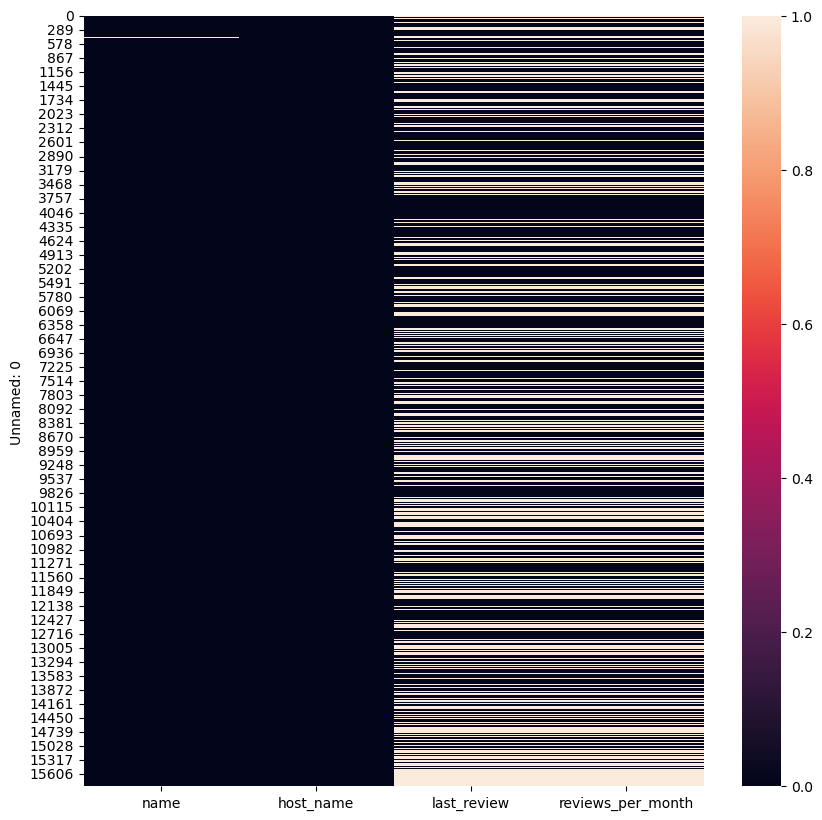

In [16]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Secara garis besar:  
* *missing value* di kolom `last_review` dan `reviews_per_month` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom `last_review` dan `reviews_per_month` sama-sama mencapai 36.5%.
* *missing value* di kolom `last_review` dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak akan dilakukan pada dataset ini, karena jumlah missing value yang tergolong cukup tinggi (sampai 36.5%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

## Menangani Missing Value
Setelah melihat data diatas, selanjutnya akan dilakukan penanganan pada anomali atau missing value

Dari analisis di atas, kita sudah tau bahwa missing value `last_review` dan `reviews_per_month` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.

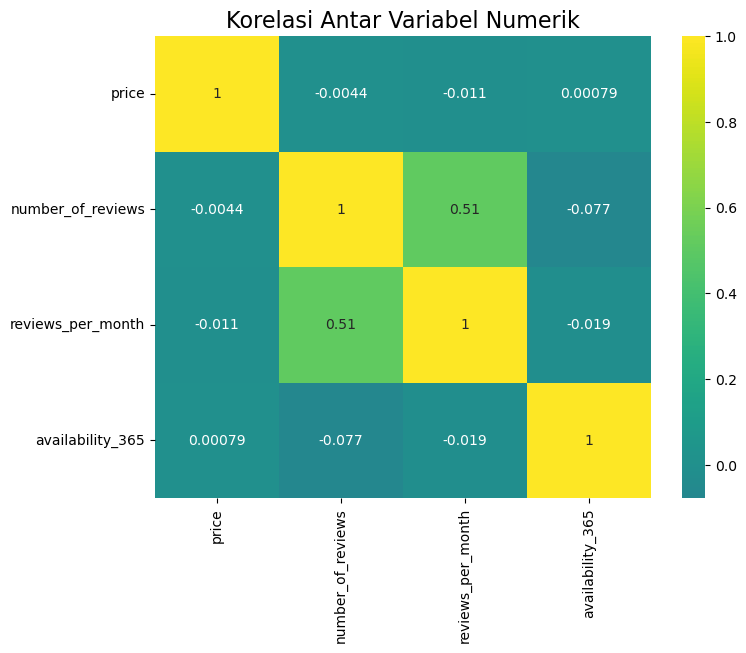

In [17]:
# Korelasi Antar Variabel Numerik
numerical_cols = ['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)
plt.title('Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

In [18]:
# jumlah missing value di kolom 'company_size' dan 'company_type'
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          5790
reviews_per_month    5790
dtype: int64

In [19]:
## membuat kolom no_reviews
df['no_reviews'] = df['number_of_reviews'] == 0

Terdapat 5.790 data kosong di kolom `last_review` dan kolom `reviews_per_month`.
Kemungkinan data kosong (NaN) terjadi karena listing belum memiliki review. oleh sebab itu bisa kita lihat menggunakan kolom `number_of_reviews`.

In [20]:
## mengecek data number_of_review dengan last_review dan reviews_per_month
df[df['number_of_reviews'] == 0][['number_of_reviews', 'last_review', 'reviews_per_month']].sample(10)

number_of_reviews last_review  reviews_per_month
Unnamed: 0                                                  
9140                        0         NaT                NaN
15078                       0         NaT                NaN
3661                        0         NaT                NaN
15626                       0         NaT                NaN
9506                        0         NaT                NaN
3006                        0         NaT                NaN
3959                        0         NaT                NaN
9995                        0         NaT                NaN
10015                       0         NaT                NaN
15700                       0         NaT                NaN

In [21]:
# Buat filter data dengan number_of_reviews = 0
mask = df['number_of_reviews'] == 0

# Cek apakah ada nilai TIDAK NaN di reviews_per_month saat number_of_reviews = 0
non_null_review_per_month = df.loc[mask, 'reviews_per_month'].notna().sum()

print(f"Ada {non_null_review_per_month} baris yang punya reviews_per_month TIDAK NaN saat number_of_reviews == 0")

# Hitung berapa baris yang 'last_review' nya TIDAK NaN
non_null_last_review = df.loc[mask, 'last_review'].notna().sum()

print(f"Ada {non_null_last_review} baris yang punya last_review TIDAK NaN saat number_of_reviews == 0")


Ada 0 baris yang punya reviews_per_month TIDAK NaN saat number_of_reviews == 0
Ada 0 baris yang punya last_review TIDAK NaN saat number_of_reviews == 0


Dari analisis diatas bisa dilihat bahwa setiap kolom `number_of_review` tidak memiliki nilai atau 0 kolom `last_review` dan `reviews_per_month` juga tidak diketahui nilainya. hal ini menunjukkan kemungkinan bahwa listing tersebut belum memiliki review sama sekali.
* untuk memudahkan dalam melakukan analisis kedepannya nilai `last_review`  TIDAK akan dirubah ke tanggal default (1970-01-01) karena beresiko *misleading* pada analisis dan mengacaukan korelasi.

* sedangkan nilai pada kolom `reviews_per_month` yang missing (NaN) akan diisi dengan nilai 0. ini berdasarkan logika bahwa jika di kolom `number_of_review == 0` atau tidak ada review sama sekali, maka review per bulan juga pasti 0. NaN dalam kasus ini bisa diartikan sebagai tidak ada aktivitas review dan bukan karena data hilang atau error.

Pengisian data dengan pendekatan ini diharapkan tidak mengganggu distribusi data yang ada.

In [22]:
## mengubah nilai reviews per month menjadi 0
df.loc[df['number_of_reviews'] == 0, 'reviews_per_month'] = 0

In [23]:
df['reviews_per_month'].value_counts()
## data NaN sudah berubah menjadi 0

reviews_per_month
0.00     5790
0.02      498
0.03      467
1.00      304
0.05      248
         ... 
6.70        1
4.26        1
6.12        1
4.57        1
16.00       1
Name: count, Length: 514, dtype: int64

In [24]:
# jumlah data kosong setelah pengisian
df['reviews_per_month'].isna().sum()

0

In [25]:
# melihat jumlah data kosong di kolom lain
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
no_reviews                           0
dtype: int64

In [26]:
## melihat data yang kosong di kolom host_name
df[df['host_name'].isna()]

id           name    host_id host_name neighbourhood  \
Unnamed: 0                                                               
3571        19682464  Cozy Hideaway  137488762       NaN     Bang Kapi   

            latitude  longitude     room_type  price  minimum_nights  \
Unnamed: 0                                                             
3571        13.76999  100.63769  Private room   1399               3   

            number_of_reviews last_review  reviews_per_month  \
Unnamed: 0                                                     
3571                        1  2017-07-29               0.02   

            calculated_host_listings_count  availability_365  \
Unnamed: 0                                                     
3571                                     1               365   

            number_of_reviews_ltm  no_reviews  
Unnamed: 0                                     
3571                            0       False

In [27]:
## cek apakah host_id tersebut memiliki listing lain
df[df['host_id'] == 137488762]

id           name    host_id host_name neighbourhood  \
Unnamed: 0                                                               
3571        19682464  Cozy Hideaway  137488762       NaN     Bang Kapi   

            latitude  longitude     room_type  price  minimum_nights  \
Unnamed: 0                                                             
3571        13.76999  100.63769  Private room   1399               3   

            number_of_reviews last_review  reviews_per_month  \
Unnamed: 0                                                     
3571                        1  2017-07-29               0.02   

            calculated_host_listings_count  availability_365  \
Unnamed: 0                                                     
3571                                     1               365   

            number_of_reviews_ltm  no_reviews  
Unnamed: 0                                     
3571                            0       False

In [28]:
## melihat data yang kosong di kolom name
df[df['name'].isnull()]

id name   host_id        host_name neighbourhood  latitude  \
Unnamed: 0                                                                     
439          4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544          4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572          4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669          6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030         8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282        10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594        10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075        13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

            longitude        room_type  price  minimum_nights  \
Unnamed: 0                                                      
439         100.59619     Private room   1080               5   
544         100.57346     Private room   1200               1   
572         100.49821     Private room   1200               1   
669         100.60894  Entire home/apt   2424               2   
1030        100.55761     Private room   5000               3   
1282        100.52928     Private room    930               1   
1594        100.60464     Private room   1000               1   
2075        100.56416     Private room    850               1   

            number_of_reviews last_review  reviews_per_month  \
Unnamed: 0                                                     
439                         0         NaT               0.00   
544                         0         NaT               0.00   
572                         0         NaT               0.00   
669                         0         NaT               0.00   
1030                        0         NaT               0.00   
1282                        6  2017-05-13               0.07   
1594                        0         NaT               0.00   
2075                        2  2017-12-11               0.03   

            calculated_host_listings_count  availability_365  \
Unnamed: 0                                                     
439                                      1               365   
544                                      1               365   
572                                      1               365   
669                                      1               365   
1030                                     1               365   
1282                                     1               365   
1594                                     1               365   
2075                                     3               220   

            number_of_reviews_ltm  no_reviews  
Unnamed: 0                                     
439                             0        True  
544                             0        True  
572                             0        True  
669                             0        True  
1030                            0        True  
1282                            0       False  
1594                            0        True  
2075                            0       False

* data pada kolom `host_name` yang kosong tidak dirubah karena kolom ini tidak terlalu diperlukan.
* data kosong pada kolom `name` juga tidak akan diisi atau diganti karena belum ada cara untuk mengisi kolom tersebut. 

## Pengecekan Duplikat

In [29]:
## mengecek duplikat
df.duplicated()

Unnamed: 0
0        False
1        False
2        False
3        False
4        False
         ...  
15849    False
15850    False
15851    False
15852    False
15853    False
Length: 15854, dtype: bool

In [30]:
# Mengecek jumlah duplikat
df.duplicated().sum()

0

In [31]:
df[df.duplicated(subset=['id', 'host_id'])]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, no_reviews]
Index: []

Tidak ada duplikat dari kolom pada dataset Airbnb listing Bangkok

## Pengecekan Outlier

Pada poin ini, kita akan melihat distribusi dari variabel numerik dan mengeliminasi outliers tanpa menghilangkan relevansi data.

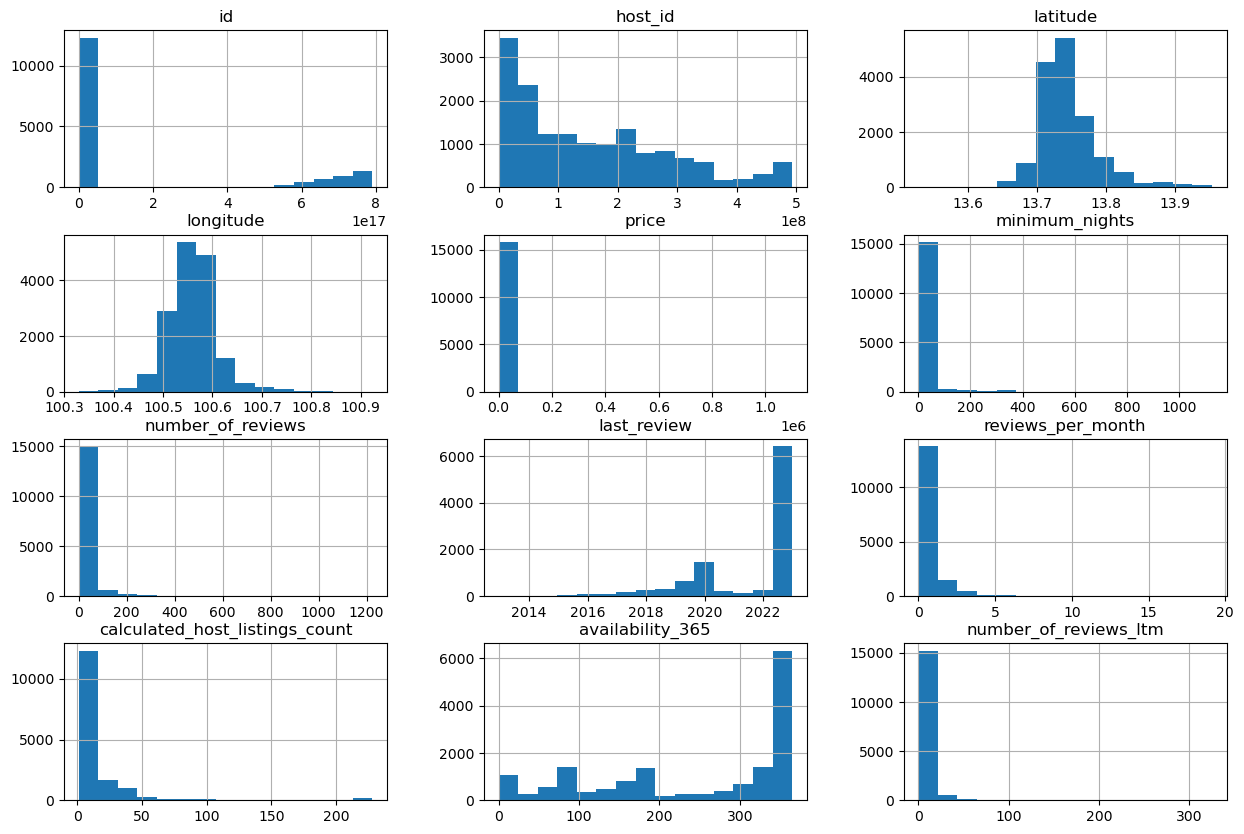

In [32]:
# mengecek melalui histogram
df.hist(bins=15, figsize=(15,10));

Histogram di atas memperlihatkan adanya outliers dia beberapa atribut seperti pada data price dan minimum_nights.

untuk itu kita akan melihat lebih jauh dengan menggunakan metode describe()

In [33]:
## Check Outliers Price
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       15854.000000   
mean   3.217704e+03       15.292355          16.654157           0.516178   
std    2.497212e+04       50.815020          40.613331           0.952753   
min    0.000000e+00        1.000000           0.000000           0.000000   
25%    9.000000e+02        1.000000           0.000000           0.000000   
50%    1.429000e+03        1.000000           2.000000           0.090000   
75%    2.429000e+03        7.000000          13.000000           0.670000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

In [34]:
df.describe()['price']

count    1.585400e+04
mean     3.217704e+03
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
std      2.497212e+04
Name: price, dtype: float64

Dari pengecekan diatas, bisa kita melihat bahwa:
- variabel price memiliki minimum 0. hal ini tidak masuk akal, karena tidak mungkin ada host yang mau memasang harga sewa 0.

Untuk mengatasi outlier tesebut, kita akan melakukan beberapa hal:
- mencari Q1 dan Q3 untuk variabel price
- melihat IQR atau *interquartile range* nya
- menentukan batas atas dan batas bawah untuk mengatasi outlier, berdasarkan IQR
- menghapus outliers

In [35]:
df.describe()['price']['25%']

900.0

In [36]:
df.describe()['price']['75%']

2429.0

In [37]:
Q1 = df.describe()['price']['25%']

In [38]:
Q3 = df.describe()['price']['75%']

In [39]:
IQR = Q3 - Q1

In [40]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [41]:
print('Melihat hasil: ')
print(f'IQR dari variabel price adalah: {IQR}')
print(f"Batas atas dari price: {Upper_Fence}")
print(f"Batasa bawah dari price: {Lower_Fence}")

Melihat hasil: 
IQR dari variabel price adalah: 1529.0
Batas atas dari price: 4722.5
Batasa bawah dari price: -1393.5


In [42]:
df[(df['price'] < Lower_Fence) | (df['price'] > Upper_Fence)] 

id                                     name  \
Unnamed: 0                                                                
17                       66046         24Flr- 1br Apt near JJ, MRT, BTS   
18                      105042      Central Bangkok 3 Bedroom Apartment   
19                     1793000         The Duplex - Asoke- Luxury 92sqm   
34                      978531      Urban Oasis in the heart of Bangkok   
48                      185364      Beautiful Wood Bangkok Resort House   
...                        ...                                      ...   
15756       786741911434733026  Private Home for 12-16 Guests 8 Parking   
15757       786742271004207966           Private Hotel for 12-16 Guests   
15765       786834873763460489           Cozy 1 bedroom 40 sqm, central   
15766       786852847114140309           Cozy 1 bedroom 40 sqm, central   
15767       786853604983296847             Grandio Ladprao 3 Bed 3 Bath   

              host_id host_name neighbourhood   latitude   longitude  \
Unnamed: 0                                                             
17             323158       Sue    Chatu Chak  13.822980  100.564840   
18             545890     Henry   Khlong Toei  13.733780  100.563030   
19            9407280      Timo       Vadhana  13.746680  100.561370   
34            5309669  Apiradee        Sathon  13.722910  100.537590   
48             889670   Narumon     Nong Chok  13.779000  100.836710   
...               ...       ...           ...        ...         ...   
15756       435016000   Tadchon     Lat Phrao  13.827958  100.591895   
15757       435016000   Tadchon    Chatu Chak  13.821809  100.563067   
15765       434168399  Krittika       Vadhana  13.735632  100.567862   
15766       434168399  Krittika       Vadhana  13.734753  100.566682   
15767       435016000   Tadchon     Bueng Kum  13.797979  100.659953   

                  room_type   price  minimum_nights  number_of_reviews  \
Unnamed: 0                                                               
17          Entire home/apt  122594               2                  9   
18          Entire home/apt    5680              28                148   
19          Entire home/apt    5034              21                287   
34          Entire home/apt    5429               2                  3   
48          Entire home/apt    8658               1                  0   
...                     ...     ...             ...                ...   
15756       Entire home/apt   17900               2                  0   
15757          Private room   17900               2                  0   
15765       Entire home/apt    7589               1                  0   
15766       Entire home/apt    7589               1                  0   
15767       Entire home/apt    8900               3                  0   

           last_review  reviews_per_month  calculated_host_listings_count  \
Unnamed: 0                                                                  
17          2020-03-04               0.09                               6   
18          2020-01-07               1.08                               1   
19          2022-11-22               2.59                               1   
34          2018-12-18               0.03                               3   
48                 NaT               0.00                               1   
...                ...                ...                             ...   
15756              NaT               0.00                              10   
15757              NaT               0.00                              10   
15765              NaT               0.00                              44   
15766              NaT               0.00                              44   
15767              NaT               0.00                              10   

            availability_365  number_of_reviews_ltm  no_reviews  
Unnamed: 0                                                       
17                

In [43]:
df_outliers_price = df[(df['price'] < Lower_Fence) | (df['price'] > Upper_Fence)] 

In [44]:
df_outliers_price

id                                     name  \
Unnamed: 0                                                                
17                       66046         24Flr- 1br Apt near JJ, MRT, BTS   
18                      105042      Central Bangkok 3 Bedroom Apartment   
19                     1793000         The Duplex - Asoke- Luxury 92sqm   
34                      978531      Urban Oasis in the heart of Bangkok   
48                      185364      Beautiful Wood Bangkok Resort House   
...                        ...                                      ...   
15756       786741911434733026  Private Home for 12-16 Guests 8 Parking   
15757       786742271004207966           Private Hotel for 12-16 Guests   
15765       786834873763460489           Cozy 1 bedroom 40 sqm, central   
15766       786852847114140309           Cozy 1 bedroom 40 sqm, central   
15767       786853604983296847             Grandio Ladprao 3 Bed 3 Bath   

              host_id host_name neighbourhood   latitude   longitude  \
Unnamed: 0                                                             
17             323158       Sue    Chatu Chak  13.822980  100.564840   
18             545890     Henry   Khlong Toei  13.733780  100.563030   
19            9407280      Timo       Vadhana  13.746680  100.561370   
34            5309669  Apiradee        Sathon  13.722910  100.537590   
48             889670   Narumon     Nong Chok  13.779000  100.836710   
...               ...       ...           ...        ...         ...   
15756       435016000   Tadchon     Lat Phrao  13.827958  100.591895   
15757       435016000   Tadchon    Chatu Chak  13.821809  100.563067   
15765       434168399  Krittika       Vadhana  13.735632  100.567862   
15766       434168399  Krittika       Vadhana  13.734753  100.566682   
15767       435016000   Tadchon     Bueng Kum  13.797979  100.659953   

                  room_type   price  minimum_nights  number_of_reviews  \
Unnamed: 0                                                               
17          Entire home/apt  122594               2                  9   
18          Entire home/apt    5680              28                148   
19          Entire home/apt    5034              21                287   
34          Entire home/apt    5429               2                  3   
48          Entire home/apt    8658               1                  0   
...                     ...     ...             ...                ...   
15756       Entire home/apt   17900               2                  0   
15757          Private room   17900               2                  0   
15765       Entire home/apt    7589               1                  0   
15766       Entire home/apt    7589               1                  0   
15767       Entire home/apt    8900               3                  0   

           last_review  reviews_per_month  calculated_host_listings_count  \
Unnamed: 0                                                                  
17          2020-03-04               0.09                               6   
18          2020-01-07               1.08                               1   
19          2022-11-22               2.59                               1   
34          2018-12-18               0.03                               3   
48                 NaT               0.00                               1   
...                ...                ...                             ...   
15756              NaT               0.00                              10   
15757              NaT               0.00                              10   
15765              NaT               0.00                              44   
15766              NaT               0.00                              44   
15767              NaT               0.00                              10   

            availability_365  number_of_reviews_ltm  no_reviews  
Unnamed: 0                                                       
17                

In [45]:
df_outliers_price['price']

Unnamed: 0
17       122594
18         5680
19         5034
34         5429
48         8658
          ...  
15756     17900
15757     17900
15765      7589
15766      7589
15767      8900
Name: price, Length: 1403, dtype: int64

Kita bisa melihat menggunakan boxplot data outliers ini.

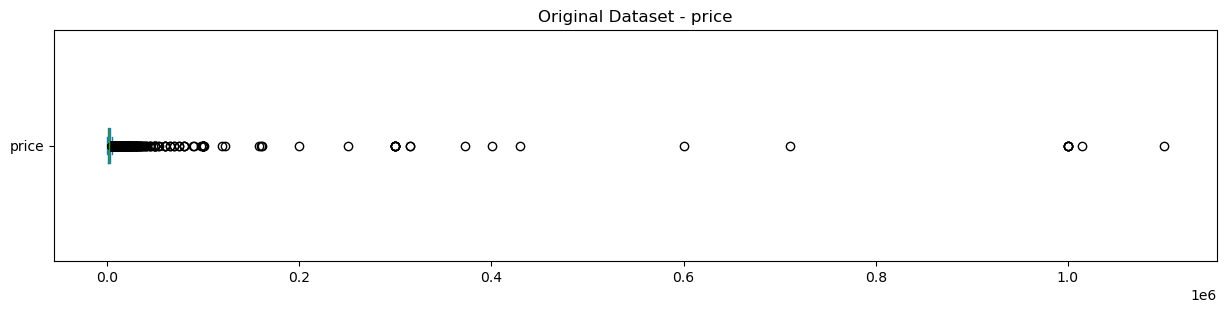

Dataset awal memiliki 15854 baris
1403 baris merupakan data yang memiliki harga lebih dari 4722.5
Sehingga, merepresentasikan 8.85% dari dataset


In [46]:
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Original Dataset - price')
plt.show()

print(f"Dataset awal memiliki {df.shape[0]} baris")
print(f"{len(df[df.price > Upper_Fence])} baris merupakan data yang memiliki harga lebih dari 4722.5")
print(f"Sehingga, merepresentasikan {(len(df[df.price > Upper_Fence]) / df.shape[0])*100 :.2f}% dari dataset")

Dari pengecekan outlier pada kolom price dapat dilihat bahwa terdapat 1403 baris yang memiliki outlier.
- Dalam kasus kita saat ini, outlier tersebut akan di drop karena analisis ini akan melihat juga pada properti yang memiliki harga yang reasonable atau masuk akal dalam artian bukan properti yang high end atau luxury atau properti yang terlalu ekstrim.
- penanganan outlier ini penting dilakukan karena dalam analisis ini kita juga ingin mengetahui area yang memiliki harga masih wajar atau terjangkau tapi tetap punya potensi review tinggi (permintaan yang bagus) dan tidak tertutup oleh properti yang super mahal yang bisa membuat rata-rata menjadi bias.

Lanjut ke penghapusan outliers

## Menghapus Outliers

In [47]:
print(f"Sebelum data di clean {df.shape}")

# menghapus data outliers
df.drop(df[df['price'] > Upper_Fence].index, axis=0, inplace=True)
df.drop(df[df['price'] == 0.0].index, axis=0, inplace=True)

print(f"Setelah data di clean {df.shape} ")

Sebelum data di clean (15854, 17)
Setelah data di clean (14450, 17) 


Melihat dataset yang sudah bersih

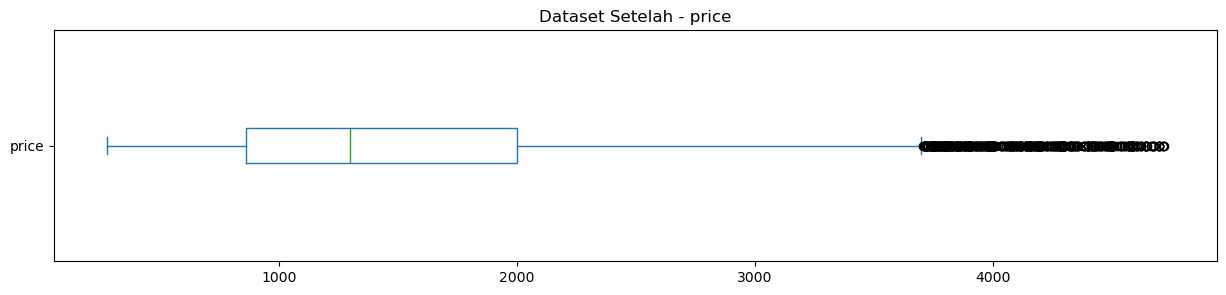

In [48]:
# boxplot price dari data yang sudah dibersihkan
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Setelah - price')
plt.show()

Kita akan kembali melihat histogram untuk memastikan outliers sudah benar tertangani

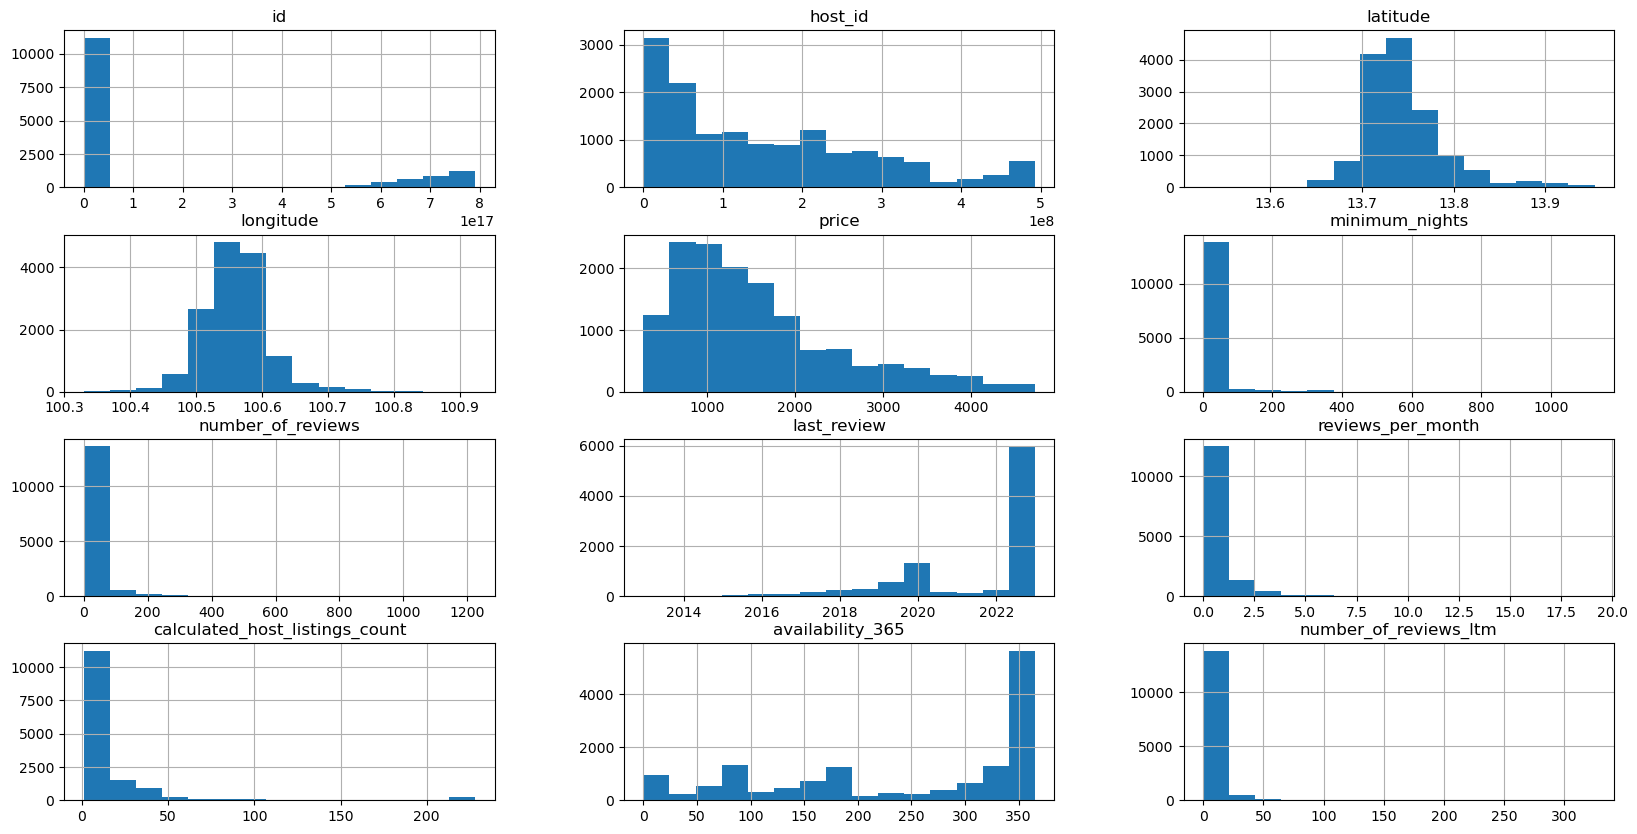

In [49]:
# Histogram dari variabel atau kolom yg memiliki atribut numerikal
df.hist(bins=15, figsize=(20,10));

In [50]:
# rangkuman dari dataset dengan variabel yg telah dibersihkan
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  14450.000000    14450.000000       14450.000000       14450.000000   
mean    1563.720761       15.383253          17.091142           0.524210   
std      942.560147       49.163431          41.493117           0.960015   
min      278.000000        1.000000           0.000000           0.000000   
25%      862.250000        1.000000           0.000000           0.000000   
50%     1300.000000        1.000000           2.000000           0.100000   
75%     2000.000000        7.000000          14.000000           0.690000   
max     4720.000000     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    14450.000000      14450.000000           14450.000000  
mean                        14.046367        243.214048               3.517647  
std                         30.969817        125.472691               8.981637  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        136.000000               0.000000  
50%                          4.000000        305.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

Melihat dari data diatas bisa dilihat sepertinya data outliers telah bersih dari dataset kita.
Oleh sebab itu, bisa dibilang data kita sudah siap untuk digunakan menganlisa.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [51]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(14450, 17)


dataFeatures        dataType  null  unique  \
0                               id           int64     0   14450   
1                             name          object     7   13472   
2                          host_id           int64     0    6198   
3                        host_name          object     1    4979   
4                    neighbourhood        category     0      50   
5                         latitude         float64     0    9138   
6                        longitude         float64     0    9645   
7                        room_type        category     0       4   
8                            price           int64     0    2319   
9                   minimum_nights           int64     0      83   
10               number_of_reviews           int64     0     294   
11                     last_review  datetime64[ns]  5147    1611   
12               reviews_per_month         float64     0     501   
13  calculated_host_listings_count           int64     0      50   
14                availability_365           int64     0     366   
15           number_of_reviews_ltm           int64     0      83   
16                      no_reviews            bool     0       2   

                                                                                     uniqueSample  
0                                                                            [19937245, 33700341]  
1   [In the Heart of Bangkok, 1 Bedroom apartement, Garden View Penthouse Studio Condo38 @Samyan]  
2                                                                          [159418135, 311114222]  
3                                                                               [Jessie, Suchonm]  
4                                                                     [Samphanthawong, Thon buri]  
5                                                                            [13.76598, 13.73406]  
6                                                                          [100.55755, 100.52946]  
7                                                                       [Hotel room, Shared room]  
8                                                                                     [1524, 837]  
9                                                                                      [355, 450]  
10                                                                                      [110, 14]  
11                                 [2018-10-15T00:00:00.000000000, 2021-03-10T00:00:00.000000000]  
12                                                                                   [1.86, 1.92]  
13                                                                                       [14, 16]  
14                                                                                      [113, 18]  
15                                                                                       [42, 61]  
16                                                                                  [False, True]

Sebelum dibersihkan, kita memiliki 15.854 baris data, sekarang kita masih memiliki 14.450 baris. Sekitar 5790 baris data kolom `number_of_review` diganti dengan nilai 0, dan sisa data kosong dibiarkan tetap kosong karena dirasa masih relevan dan tidak akan menggangu pada saat analisis. dan kita drop data dengan `price` 0.0 dan juga data `price` yang outliers.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana menentukan lokasi dan strategi listing yang paling potensial agar menarik pemesanan dan review secara optimal**.  

Analisis akan dilakukan dengan membandingkan data rata-rata harga dan review per neigbourhood. kemudian menganalisis room type, minimum nights, host type dan nama listing.

## Mencari lokasi yang optimal: `price` dan `number_of_reviews`  

Pertama, mari kita lihat area mana yang memilik kombinanasi harga tinggi dan jumlah review banyak. Kita akan menganalisis kolom  `price` dan `number_of_reviews` untuk menjawab beberapa pertanyaan.

* Area mana yang memiliki harga paling mahal?
* Area mana yang memiliki paling banyak review?

Untuk menjawab pertanyaan tersebut, kita akan melihat korelasi antara variabel `neigbourhood` dan `price` apakah terdapat korelasi antara keduanya.
hal ini dilakukan untuk melihat:
- apakah perlu klasifikasi berdasarkan `neighbourhood`?
- apakah kita bisa mencari area premium atau hidden gem berdasarkan kombinasi harga dan review? 

Untuk melihat korelasi, kita akan melakukan uji normalitas untuk mengetahui apakah kolom price dan neighbourhood memiliki sebaran data yang normal

In [52]:
df['log_price'] = np.log(df['price'])

# Inisialisasi hasil
normality_results = {}

# Loop setiap neighbourhood
for name, group in df.groupby('neighbourhood'):
    if len(group) >= 3:
        stat, p = shapiro(group['log_price'])
        normality_results[name] = {
            'Shapiro-Wilk Stat': stat,
            'p-value': p,
            'Normal': '✅ Ya' if p > 0.05 else '❌ Tidak'
        }

# Konversi ke DataFrame
normality_df = pd.DataFrame(normality_results).T.sort_values('p-value')

# Tampilkan hasil
normality_df.head(10)  # Lihat 10 neighbourhood pertama

Shapiro-Wilk Stat   p-value   Normal
Ratchathewi          0.971803       0.0  ❌ Tidak
Vadhana              0.984633       0.0  ❌ Tidak
Bang Rak              0.96883       0.0  ❌ Tidak
Phra Nakhon          0.969007       0.0  ❌ Tidak
Parthum Wan          0.960942       0.0  ❌ Tidak
Khlong Toei          0.994022  0.000001  ❌ Tidak
Don Mueang           0.937508  0.000002  ❌ Tidak
Huai Khwang          0.990293  0.000003  ❌ Tidak
Bang Na              0.977452  0.000003  ❌ Tidak
Suanluang            0.973149  0.000004  ❌ Tidak

Dari hasil uji normalitas menggunakan tes Shapiro-Wilk bisa dilihat bahwa seberan data price tiap neigbourhood tidak lah normal.
Sehingga untuk melihat apakah ada perbedan signifikan atau tidak pada price di setiap neigbourhood bisa menggunakan tes Kruskal-Walis

In [53]:
# Ambil log_price per grup
grouped_data = [group['log_price'].values for name, group in df.groupby('neighbourhood') if len(group) >= 3]

# Kruskal-Wallis test
stat, p = kruskal(*grouped_data)
print(f"Kruskal-Wallis Statistic: {stat:.4f}, p-value: {p:.4f}")

Kruskal-Wallis Statistic: 1800.5927, p-value: 0.0000


Dari hasil tersebut bisa diketahui setidaknya ada satu neighbourhood yang memiliki median harga berbeda secara signifikan dibandingkan yang lain.

Selanjutnya kita kan melihat distribusi harga antar area / neigbourhood

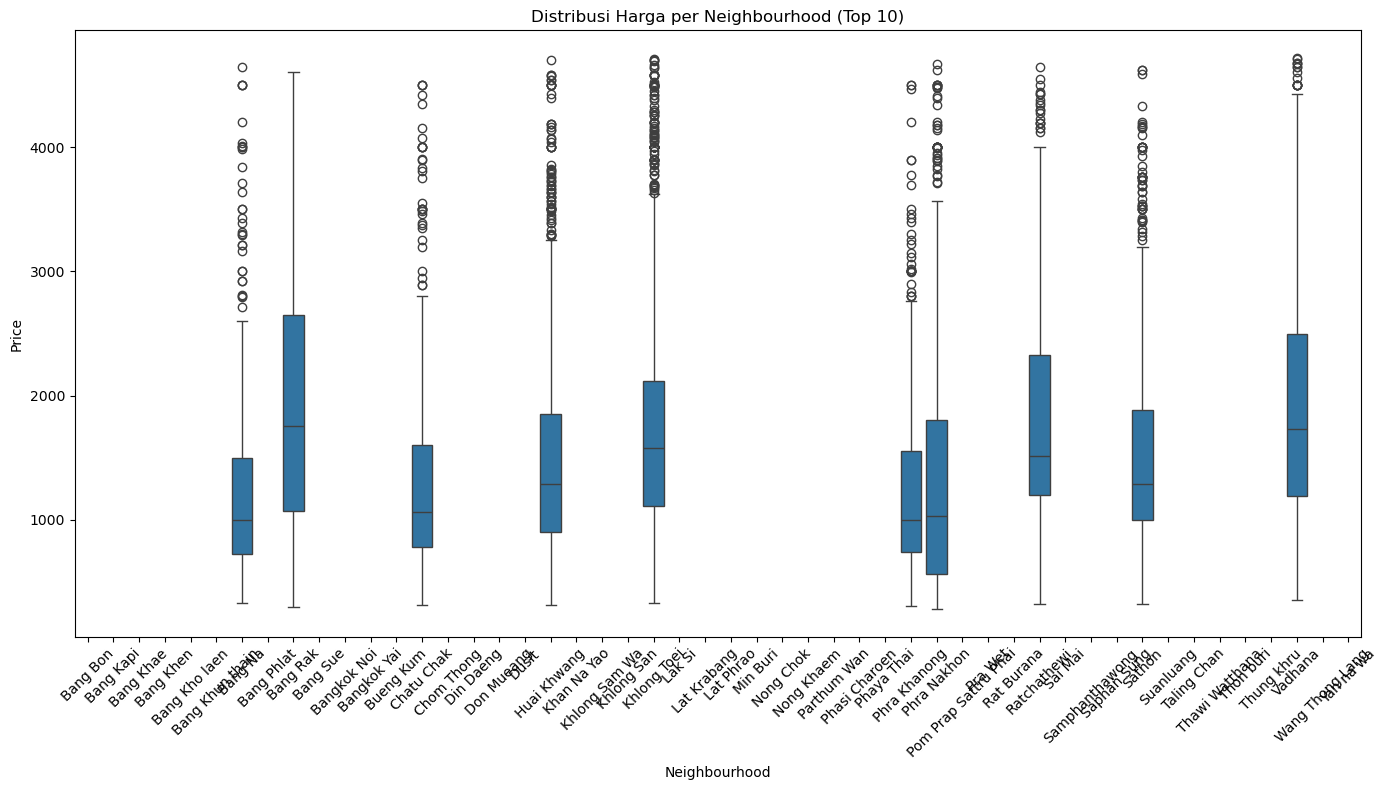

In [54]:
## melihat apakah distribusi harga antar area berbeda signifikan

plt.figure(figsize=(14, 8))
top_neigh = df['neighbourhood'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['neighbourhood'].isin(top_neigh)],
            x='neighbourhood',
            y='price')
plt.title("Distribusi Harga per Neighbourhood (Top 10)")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.xlabel("Neighbourhood")
plt.tight_layout()
plt.show()

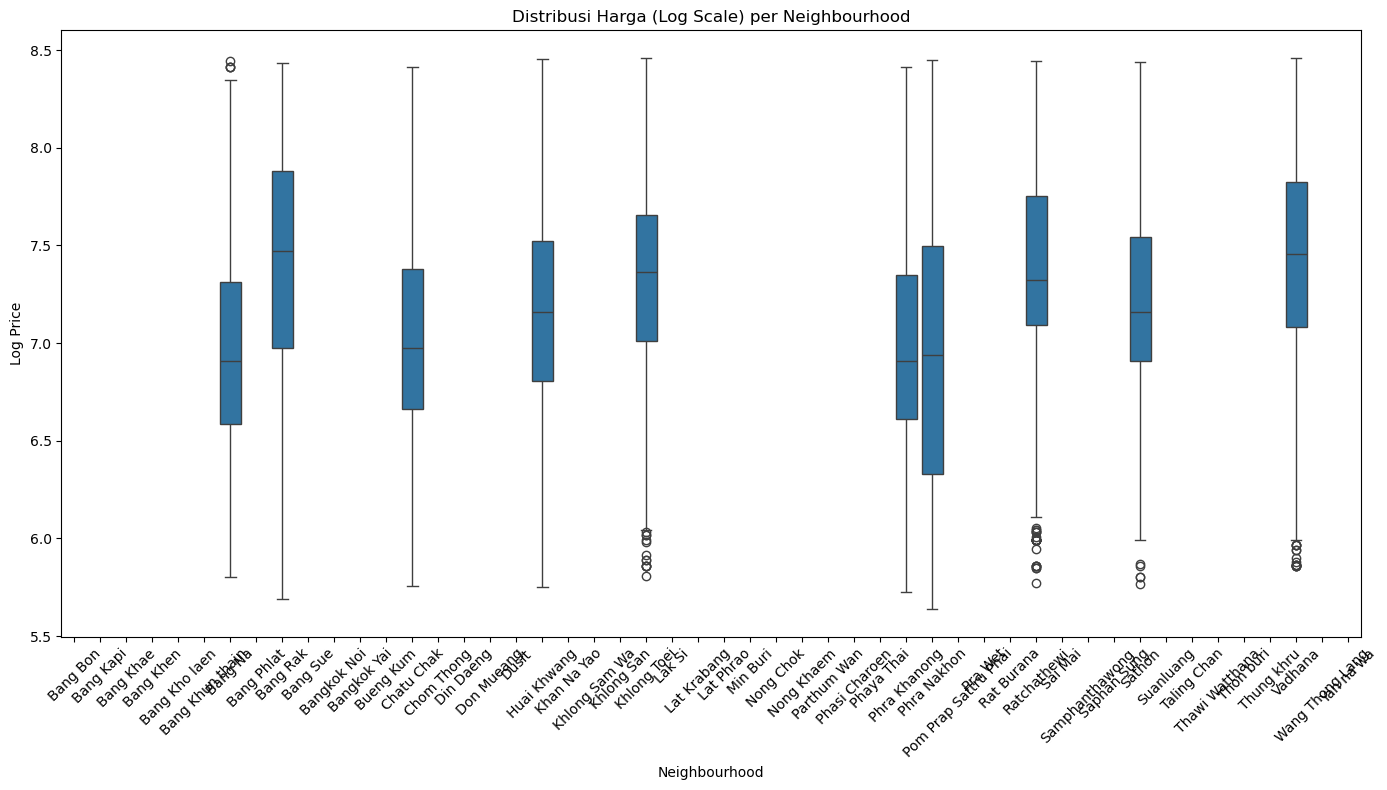

In [55]:
## melihat pakai log scale, untuk melihat persebaran lebih jelas dan megurangi efek outlier

df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['neighbourhood'].isin(top_neigh)],
            x='neighbourhood',
            y='log_price')
plt.title("Distribusi Harga (Log Scale) per Neighbourhood")
plt.xticks(rotation=45)
plt.ylabel("Log Price")
plt.xlabel("Neighbourhood")
plt.tight_layout()
plt.show()


Dari distribusi data tersebut dapat diinterpretasikan:
1. Kawasan dengan median harga tertinggi:
    - Vadhana dan Khlong Toei memiliki median log price lebih tinggi dari kawasan lain
    - artinya properti di dua area ini cenderung lebih mahal
2. Kawasan dengan Median Rendah:
    - Phra Khanong dan Phra Nakhon memiliki median terendah
    - ini menunjukkan kedua area tersebut masih relatif lebih terjangkau
3. Penyebaran harga:
    - Beberapa kawasan seperti Vadhana, Huai Khwang dan Khlong Toei punya penyebaran log price yang lebar, berarti variasai harga properti di area itu besar
    - Sedangkan variasi harga di Phra Nakhon cenderung lebih mirip atau tidak terlalu bervariasai jauh

Selanjutnya kita akan melihat rata-rata price dan number per neigbourhood untuk mencari lokasi yang optimal

In [56]:
## Menghitung rata-rata price dan number_of_reviews per neigbourhood
grouped_optimal = df.groupby('neighbourhood')[['price', 'number_of_reviews']].mean()

In [57]:
## Standarisasi data dengan membuat kolom baru price_score dan review_score

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
grouped_optimal[['price_score', 'review_score']] = scaler.fit_transform(grouped_optimal[['price', 'number_of_reviews']])

In [58]:
## gabungkan menjadi skor total
grouped_optimal['total_score'] = grouped_optimal['price_score'] + grouped_optimal['review_score']

In [59]:
## Sorting berdasarkan total score tertinggi
optimal_area = grouped_optimal.sort_values(by='total_score', ascending=False)
optimal_area.head(10)  # Top 10 area dengan harga tinggi dan review tinggi

price  number_of_reviews  price_score  \
neighbourhood                                                       
Pom Prap Sattru Phai  1614.365385          38.240385     0.506825   
Parthum Wan           2179.364362          19.183511     1.000000   
Bang Rak              1924.585366          22.570461     0.777609   
Phaya Thai            1535.348259          33.477612     0.437852   
Vadhana               1912.389486          18.514980     0.766963   
Khlong Toei           1767.666137          20.296237     0.640638   
Sathon                1532.140420          27.913386     0.435052   
Ratchathewi           1758.527856          18.939566     0.632661   
Samphanthawong        1866.323232          12.383838     0.726753   
Khlong San            1558.100000          20.100000     0.457712   

                      review_score  total_score  
neighbourhood                                    
Pom Prap Sattru Phai      1.000000     1.506825  
Parthum Wan               0.500204     1.500204  
Bang Rak                  0.589032     1.366641  
Phaya Thai                0.875089     1.312941  
Vadhana                   0.482670     1.249634  
Khlong Toei               0.529387     1.170024  
Sathon                    0.729158     1.164211  
Ratchathewi               0.493806     1.126467  
Samphanthawong            0.321872     1.048625  
Khlong San                0.524240     0.981952

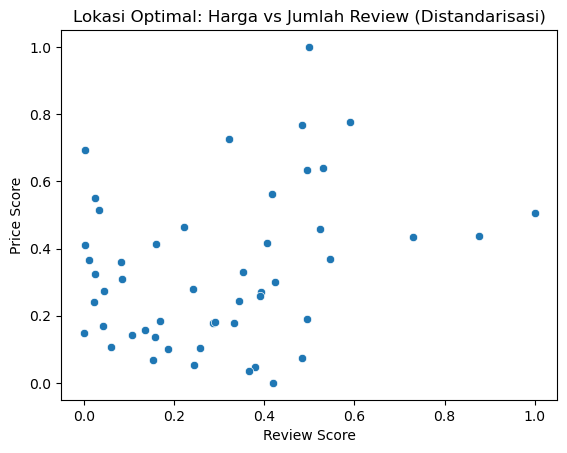

In [60]:
# Visualisasi
sns.scatterplot(data=grouped_optimal, x='review_score', y='price_score')
plt.title("Lokasi Optimal: Harga vs Jumlah Review (Distandarisasi)")
plt.xlabel("Review Score")
plt.ylabel("Price Score")
plt.show()

Scatterplot diatas menunjukkan bahwa lokasi optimal berdasarkan harga dan jumlah review itu berada di daerah Pom Prap Sattru Phai, Parthum Wan, Bang Rak, Phaya Thai, dan Vadhana. 
- Area tersebut merupakan area yang memiliki harga mahal dan review terbanyak
- ini bisa kita sebut sebagai area premium yang memiliki banyak permintaan

Setalah melihat data tersebut, perlu juga kita melihat apakah lokasi atau area tersebut sudah *oversaturated* atau terlalu banyak listing. Jika lokasi tersebut sudah *oversaturated* bisa diartikan bahwa area tersebut sudah terlalu kompetitif. dan akan tidak disarankan untuk berekspansi ke area tersebut.

Sehingga selanjutnya kita akan melihat lokasi yang:
- memiliki harga tinggi
- banyak review (permintaan tinggi)
- jumlah listing tidak terlalu banyak (persaingan tidak ketat)

In [61]:
## Menghitung jumlah listing per neigbourhood
listing_count = df.groupby('neighbourhood').size().reset_index(name='listing_count')

In [62]:
## gabungkan ke grouped_optimal
grouped_optimal = grouped_optimal.reset_index()
grouped_optimal = grouped_optimal.merge(listing_count, on='neighbourhood')

In [63]:
## skor ulang termasuk listing_count
## Karena kita ingin listing sedikit itu bagus, maka kita balik skalanya (semakin sedikit listing = skor semakin tinggi)

grouped_optimal['inv_listing_count'] = 1 / grouped_optimal['listing_count']

# Normalisasi ulang semua skor
scaled = scaler.fit_transform(grouped_optimal[['price', 'number_of_reviews', 'inv_listing_count']])
grouped_optimal[['price_score', 'review_score', 'inv_competition_score']] = scaled

In [64]:
## Total skor gabungan 3 variabel
grouped_optimal['total_score'] = (
    grouped_optimal['price_score'] +
    grouped_optimal['review_score'] +
    grouped_optimal['inv_competition_score']
)

In [65]:
## Sorting berdasarkan skor total
best_locations = grouped_optimal.sort_values(by='total_score', ascending=False)
best_locations[['neighbourhood', 'price', 'number_of_reviews', 'listing_count', 'total_score']].head(10)

neighbourhood        price  number_of_reviews  listing_count  \
34  Pom Prap Sattru Phai  1614.365385          38.240385            104   
29           Parthum Wan  2179.364362          19.183511            376   
0               Bang Bon  1504.400000           0.200000              5   
8               Bang Rak  1924.585366          22.570461            738   
31            Phaya Thai  1535.348259          33.477612            402   
47               Vadhana  1912.389486          18.514980           1769   
22           Khlong Toei  1767.666137          20.296237           1887   
41                Sathon  1532.140420          27.913386            762   
27             Nong Chok  1827.545455           0.181818             11   
37           Ratchathewi  1758.527856          18.939566           1059   

    total_score  
34     1.552373  
29     1.510880  
0      1.413170  
8      1.370777  
31     1.322755  
47     1.249811  
22     1.170024  
41     1.168133  
27     1.147856  
37     1.128544

In [66]:
## Visualisasi

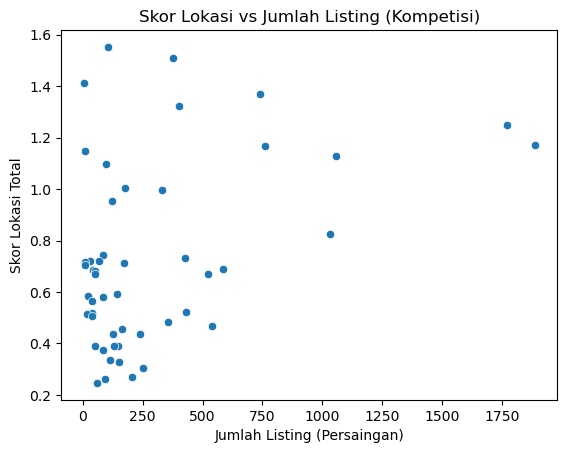

In [67]:
sns.scatterplot(data=best_locations, x='listing_count', y='total_score')
plt.title("Skor Lokasi vs Jumlah Listing (Kompetisi)")
plt.xlabel("Jumlah Listing (Persaingan)")
plt.ylabel("Skor Lokasi Total")
plt.show()

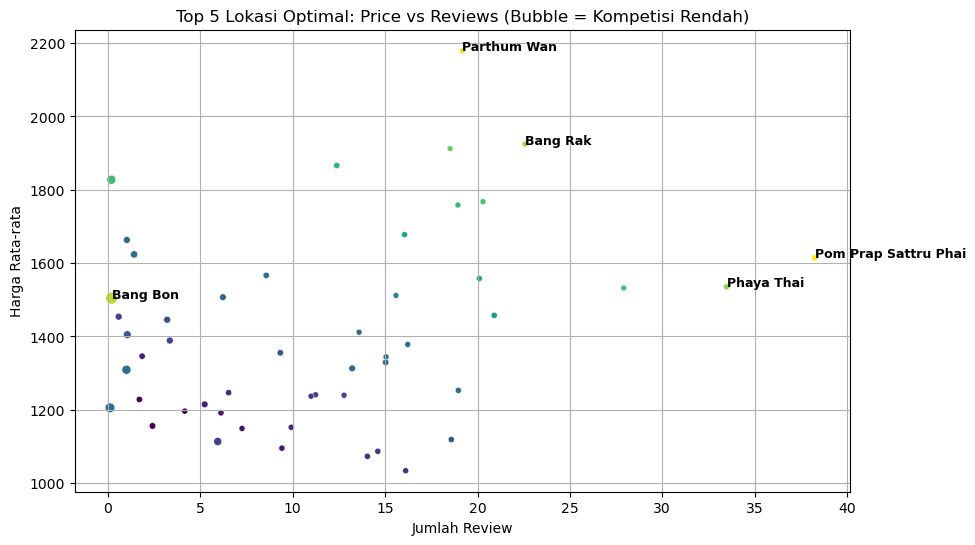

In [68]:
## melihat 5 lokasi optimal

plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_locations, x='number_of_reviews', y='price', size='inv_listing_count', hue='total_score', palette='viridis', legend=False)

# Tampilkan label hanya untuk 5 teratas
top5 = best_locations.head(5)
for i, row in top5.iterrows():
    plt.text(row['number_of_reviews'], row['price'], row['neighbourhood'], fontsize=9, weight='bold')

plt.title("Top 5 Lokasi Optimal: Price vs Reviews (Bubble = Kompetisi Rendah)")
plt.xlabel("Jumlah Review")
plt.ylabel("Harga Rata-rata")
plt.grid(True)
# plt.savefig("Top 5 Lokasi Optimal berdasarkan Skor Total.png")
plt.show()

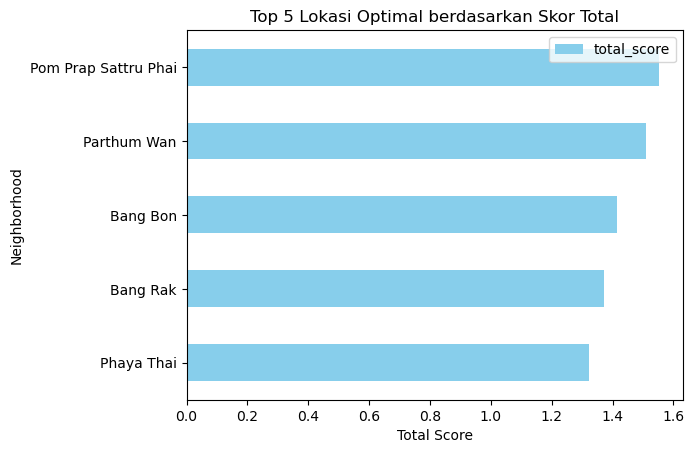

In [69]:
top5.plot(x='neighbourhood', y='total_score', kind='barh', color='skyblue')
plt.title("Top 5 Lokasi Optimal berdasarkan Skor Total")
plt.xlabel("Total Score")
plt.ylabel("Neighborhood")
plt.gca().invert_yaxis()
plt.show()


Analisis diatas memperlihatkan bahwa area Pom Prap Sattru Phai, Parthum Wan, Bang Bon, Bang Rak dan Phaya Thai merupakan **area premium** atau memiliki harga yang tinggi dan review yang dimiliki juga tinggi. Selain itu grafik diatas juga memperhatikan jumlah listing di area. sehingga berdasarkan hal tersebut kelima area ini memiliki harga yang tinggi dengan jumlah review banyak dan jumlah listing yang tidak terlalu banyak. sehingga kompetisi di area tersebut masih rendah.
- Area **Pom Prap Sattru Phai, Parthum Wan, Bang Bon, Bang Rak dan Phaya Thai** merupakan area yang disarankan **ekspansi** untuk kategori **premium**


Sekarang kita melihat lokasi Hidden gem - yaitu lokasi yang:
- review tinggi (permintaan bagus)
- harga masih rendah (kompetitor belum sadar potensinya)

Analisis ini sangat cocok untuk ekspansi sebelum area tersebut menjadi rebutan investor lain atau menjadi *oversaturasi*.

In [70]:
## membuat dataframe baru dan melakukan normalisasi nilai (biar setara)
from sklearn.preprocessing import MinMaxScaler

grouped = df.groupby('neighbourhood')[['price', 'number_of_reviews']].mean()
scaler = MinMaxScaler()
grouped_scaled = pd.DataFrame(scaler.fit_transform(grouped), 
                              columns=['scaled_price', 'scaled_reviews'],
                              index=grouped.index)

In [71]:
## membuat kolom hidden_gem_score
grouped_scaled['hidden_gem_score'] = grouped_scaled['scaled_reviews'] - grouped_scaled['scaled_price']

In [72]:
## urutkan berdasarkan score tertinggi
hidden_gems = grouped_scaled.sort_values('hidden_gem_score', ascending=False).head(10)
hidden_gems

scaled_price  scaled_reviews  hidden_gem_score
neighbourhood                                                       
Pom Prap Sattru Phai      0.506825        1.000000          0.493175
Phaya Thai                0.437852        0.875089          0.437236
Bang Sue                  0.000000        0.419662          0.419662
Lat Krabang               0.074236        0.484387          0.410151
Don Mueang                0.046294        0.380123          0.333829
Lak Si                    0.034265        0.365307          0.331042
Thon buri                 0.191185        0.494330          0.303145
Sathon                    0.435052        0.729158          0.294106
Phasi Charoen             0.053735        0.243995          0.190261
Bang Kho laen             0.369872        0.545306          0.175434

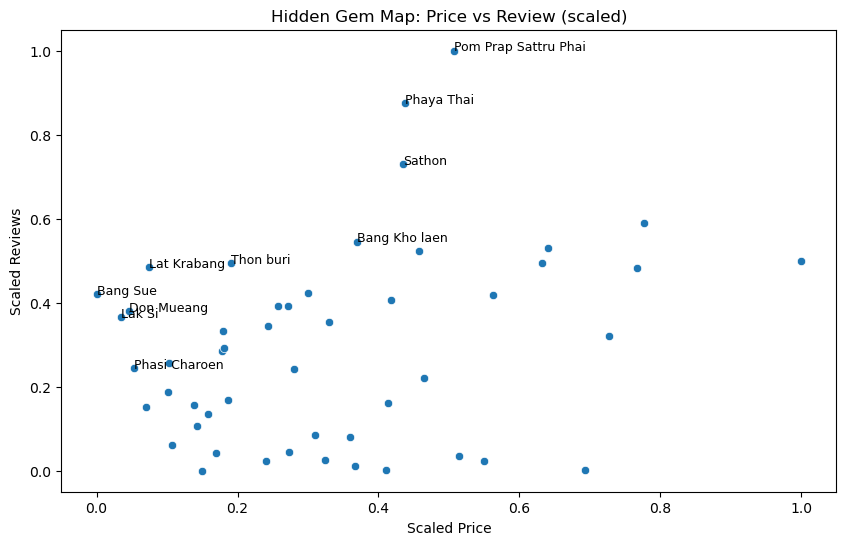

In [73]:
# visualisasi
plt.figure(figsize=(10,6))
sns.scatterplot(data=grouped_scaled, x='scaled_price', y='scaled_reviews')

for area in hidden_gems.index:
    x = grouped_scaled.loc[area, 'scaled_price']
    y = grouped_scaled.loc[area, 'scaled_reviews']
    plt.text(x, y, area, fontsize=9)

plt.title('Hidden Gem Map: Price vs Review (scaled)')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Reviews')
plt.show()

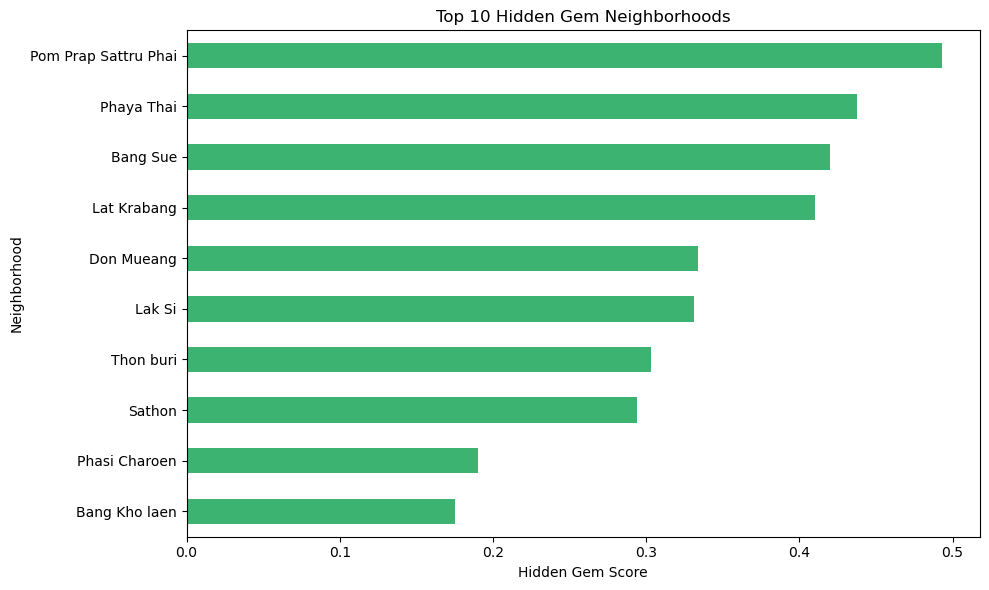

In [74]:
top_hidden = hidden_gems['hidden_gem_score'].sort_values(ascending=False).head(10)

top_hidden.plot(kind='barh', color='mediumseagreen', figsize=(10, 6))
plt.title("Top 10 Hidden Gem Neighborhoods")
plt.xlabel("Hidden Gem Score")
plt.ylabel("Neighborhood")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


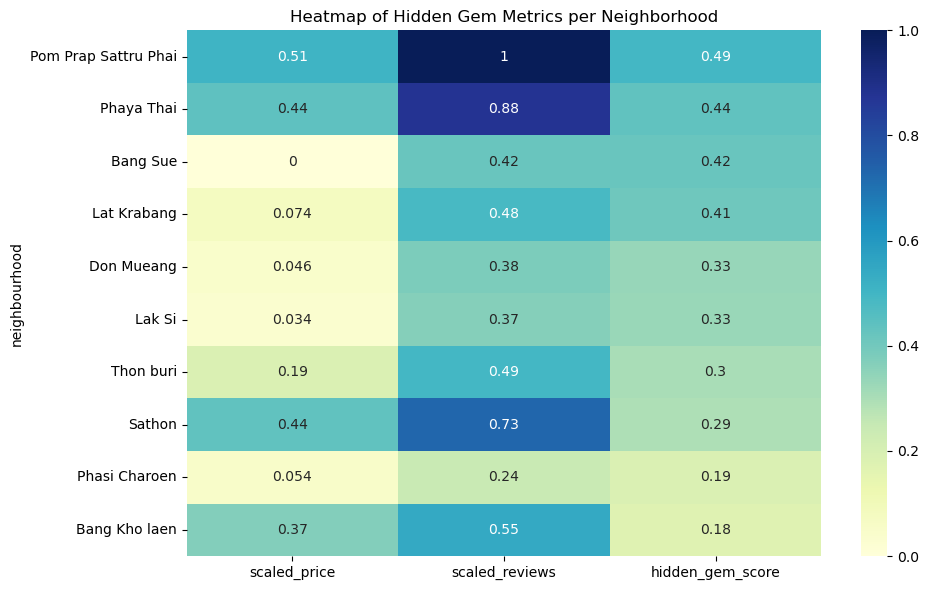

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(hidden_gems[['scaled_price', 'scaled_reviews', 'hidden_gem_score']], annot=True, cmap='YlGnBu')
plt.title("Heatmap of Hidden Gem Metrics per Neighborhood")
plt.tight_layout()
# plt.savefig("Heatmap of Hidden Gem Metrics per Neighborhood.png")
plt.show()

Berdasarkan eksplorasi di atas, bisa dilihat untuk **area hidden gem** yang layak untuk direkomendasikan sebagai tempat berekspansi yaitu area **Pom Prap Sattru Phai, Phaya Thai, Bang Sue, Lat Krabang dan Don Mueang**.

Jika dilihat secara lebih dalam lagi secara wilayah:
- Pom Prap Sattru Phai
  - Karakteristik: Distrik tua di tengah kota, dekat Chinatown (Yaowarat) dan area heritage Bangkok.
  - Kelebihan: Lokasi autentik untuk yang cari pengalaman budaya lokal.
  - Potensi Airbnb: Lebih banyak townhouse tua atau boutique guesthouse ketimbang kondominium modern → listing entire home ada, tapi lebih niche (unik, heritage style).

- Phaya Thai:
  - Karakteristik: Pusat transportasi utama. Ada BTS Phaya Thai, Airport Rail Link langsung ke Bandara Suvarnabhumi.
  - Kelebihan: Dekat dengan Victory Monument (hub bus dan BTS), serta Siam/Sukhumvit area.
  - Potensi Airbnb: Bagus untuk transit traveler dan turis kota; apartemen di sini sering disewakan ke solo traveler atau pasangan → banyak listing entire home kecil/studio.

- Bang Sue
  - Karakteristik: Akses mudah ke pusat kota dan Bandara Don Mueang.
  - Kelebihan: Merupkan hub kereta jarak jauh, Airport Rail Link, MRT Blue Line dan jalur kereta cepat di masa depan.
  - Potensi Airbnb: Wisatawan yang ingin lokasi dekat transportasi, tapi harga properti lebih murah dibandingkan pusat kota (Sukhumvit/Sathorn). Traveler lokal dari kota-kota lain di Thailand. Orang yang transit di Bangkok untuk beberapa hari.

- Lat Krabang
    - Karakteristik: Area dekat Bandara Suvarnabhumi.
    - Kelebihan: Cocok untuk pelancong yang mau stay dekat bandara sebelum/selesai perjalanan.
    - Potensi Airbnb: Cukup baik untuk entire home jangka pendek (transit, semalam, early/late flight). Banyak hotel budget juga di sini.
    - Catatan: Lebih suburban, jauh dari pusat kota.

- Don Mueang
    - Karakteristik: Lokasi Bandara Don Mueang (penerbangan domestik dan low-cost airlines internasional).
    - Kelebihan: Transit area penting untuk pelancong budget dan domestik.
    - Potensi Airbnb: Mirip Lat Krabang — entire home cocok untuk transit stay atau group traveler.

Setelah kita sudah mengetahui lokasi-lokasi mana saja yang termasuk kedalam kategori premium dan hidden gems. Muncul pertanyaan **Apakah harga listing di Hidden Gem secara statistik signifikan lebih murah dibandingkan listing di Lokasi Premium?**
untuk menjawab hal ini kita akan melakukan analisis inferensial statistik menggunakan t-test independent.

In [76]:
## Melihat perbedaan harga di neigbourhood premioum dan hidden gem

hidden_gem_neighborhoods = ['Pom Prap Sattru Phai', 'Phaya Thai', 'Bang Sue', 'Lat Krabang', 'Don Muang']
premium_neighborhoods = ['Pom Prap Sattru Phai', 'Pathum Wan', 'Bang Bon', 'Bang Rak', 'Phaya Thai']

# Filter harga untuk hidden gem dan premium area
hidden_gem_prices = df[df['neighbourhood'].isin(hidden_gem_neighborhoods)]['price']
premium_prices = df[df['neighbourhood'].isin(premium_neighborhoods)]['price']

# Hapus missing value kalau ada
hidden_gem_prices = hidden_gem_prices.dropna()
premium_prices = premium_prices.dropna()

# Lakukan t-test independent
stat, p_value = ttest_ind(hidden_gem_prices, premium_prices, equal_var=False)

print(f"Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretasi hasil
if p_value < 0.05:
    print("✅ Perbedaan harga antara Hidden Gem dan Premium adalah SIGNIFIKAN.")
else:
    print("❌ Tidak ada perbedaan harga yang signifikan antara Hidden Gem dan Premium.")


Statistic: -10.9508
P-Value: 0.0000
✅ Perbedaan harga antara Hidden Gem dan Premium adalah SIGNIFIKAN.


Berdasarkan hasil uji t-test independent, bisa kita lihat bahwa:
- Berdasarkan uji t-test, p-value = 0.0000.
- Karena p-value < 0.05, maka harga di Hidden Gem area signifikan lebih murah dibandingkan Premium area.
- Ini **mendukung rekomendasi** ekspansi cepat di Hidden Gem sebelum harga naik.

## Berdasarkan Room Types

Setelah kita mengetahui lokasi mana yang cocok untuk melakukan ekspansi, mari kita lihat kriteria-kriteria yang berkaitan dengan room types. Fitur yang terkait adalah `room_types`, `availability_365`, `price`, `number_of_reviews` dan `neighbourhood`.

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:  
* Tipe kamar seperti apa yang banyak memiliki listing?
* Tipe kamar apa yang paling laku atau paling banyak di booking?
* Bagaimana sebaran harga dan tipe kamar di setiap neigbourhood?

In [77]:
# 1. Jumlah listing per room_type
room_counts = pd.crosstab(index=df['room_type'], columns='Jumlah')
print("Jumlah listing per room type:")
room_counts

Jumlah listing per room type:


col_0            Jumlah
room_type              
Entire home/apt    8107
Hotel room          553
Private room       5281
Shared room         509

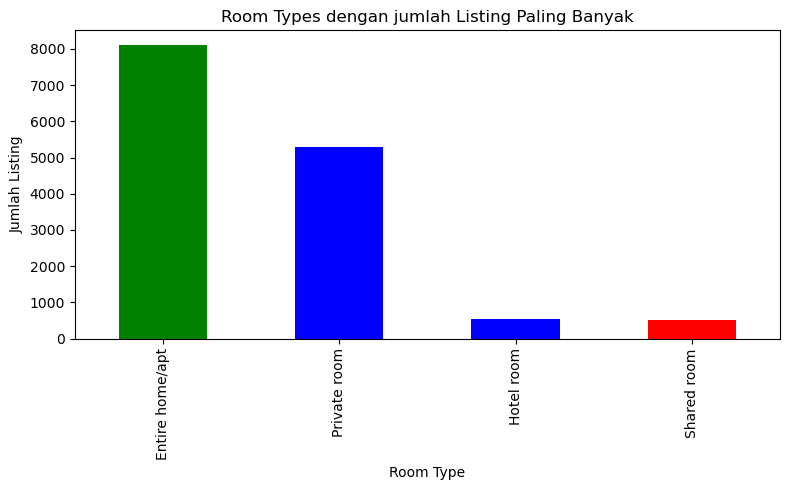

In [78]:
# Visualisasi
room_counts_sorted = room_counts.squeeze().sort_values(ascending=False)
room_counts_sorted.plot(kind='bar', figsize=(8,5), legend=False, color=['g', 'b', 'b', 'r'])
plt.title('Room Types dengan jumlah Listing Paling Banyak')
plt.xlabel('Room Type')
plt.ylabel('Jumlah Listing')
plt.tight_layout()
plt.show()

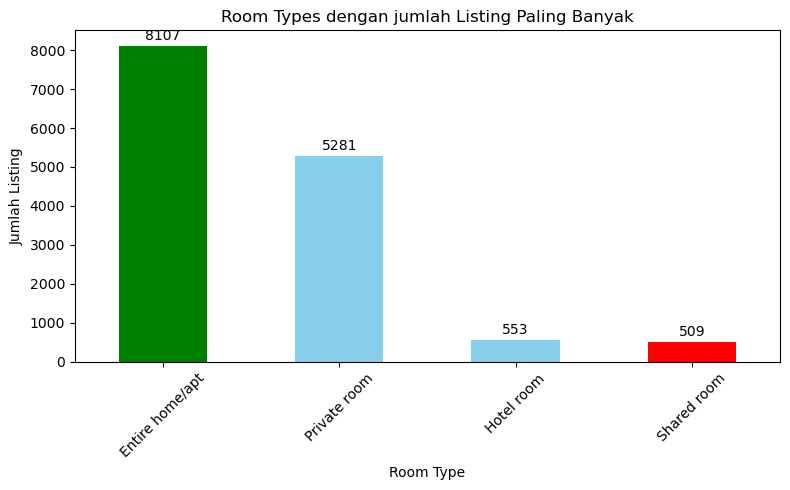

In [79]:
# Tentukan warna: tertinggi dan terendah warna beda
colors = ['skyblue'] * len(room_counts_sorted)
colors[0] = 'green'   # tertinggi
colors[-1] = 'red'    # terendah

# Plot
ax = room_counts_sorted.plot(kind='bar', figsize=(8,5), color=colors)

# Tambahkan angka di atas bar
for i, value in enumerate(room_counts_sorted):
    ax.text(i, value + max(room_counts_sorted)*0.01, str(value), ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label
plt.title('Room Types dengan jumlah Listing Paling Banyak')
plt.xlabel('Room Type')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("Room Types dengan jumlah Listing Paling Banyak.png")
plt.show()

In [80]:
## melihat presentasi jumlah listing per room types
(pd.crosstab(index=df['room_type'], columns='Jumlah', normalize=True) * 100).round(2)

col_0            Jumlah
room_type              
Entire home/apt   56.10
Hotel room         3.83
Private room      36.55
Shared room        3.52

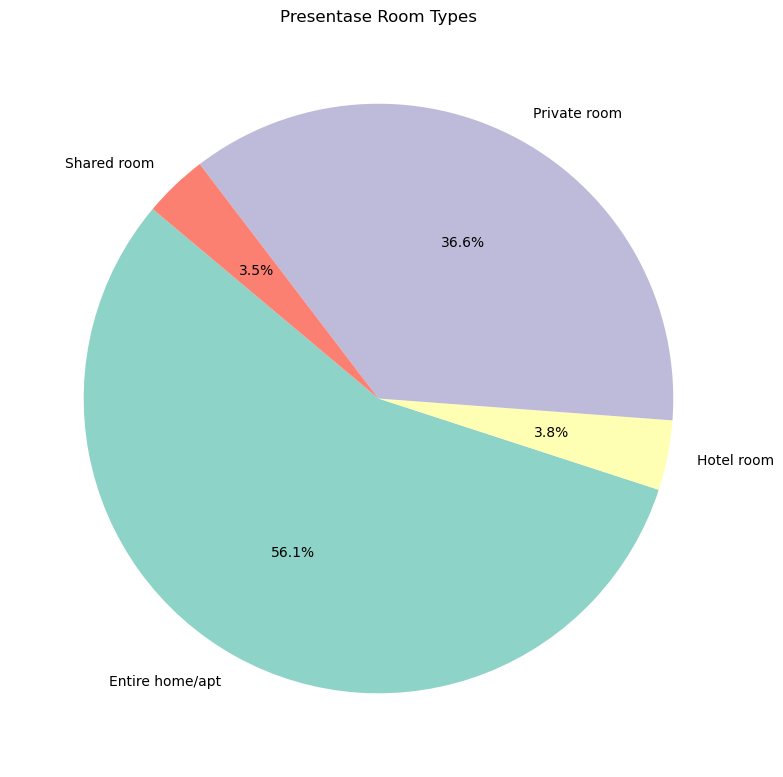

In [81]:
# Visualisasi
# Ambil data presentasi listing per room type
presentasi_listing = (pd.crosstab(index=df['room_type'], columns='Jumlah', normalize=True) * 100).round(2)

# Ambil kolom sebagai Series
counts = presentasi_listing['Jumlah']

# Plot pie chart
plt.figure(figsize=(8,8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# Tambahkan judul dan rapikan layout
plt.title('Presentase Room Types')
plt.ylabel('')
plt.tight_layout()
# plt.savefig("Presentase Room Types.png")
plt.show()


In [82]:
# 2. Rata-rata price & reviews per room_type
room_summary = df.groupby('room_type').agg({
    'price': ['mean', 'median'],
    'number_of_reviews': 'mean',
    'reviews_per_month': 'mean'
}).round(2)

print("\nRingkasan performa tiap room type:")
room_summary


Ringkasan performa tiap room type:


price         number_of_reviews reviews_per_month
                    mean  median              mean              mean
room_type                                                           
Entire home/apt  1705.51  1480.0             22.62              0.71
Hotel room       1691.23  1467.0             21.87              0.35
Private room     1421.80  1177.0              9.25              0.30
Shared room       639.34   500.0              5.18              0.11

Dari anlisis di atas, kita bisa melihat bahwa tipe kamar Entire home/apt mendominasi jumlah listing paling banyak. berdarakan karena tipe ini lebih mudah perizinannya dan secara rata-rata harga juga lebih menguntungkan.

Berdasarkan Peraturan Hotel Thailand [Hotel Act B.E. 2547 (2004)](https://franklegaltax.com/how-to-legally-rent-out-a-property/), dikatakan bahwa Hotel merupakan penginapan yang dibuat untuk tujuan komersial untuk memfasilitasi akomodasi sementara bagi pelancong. Sehingga, sewa bulanan atau lebih itu tidak termasuk dalam artian hotel dan tidak perlu memiliki lisensi operasional hotel. Dalam kasus kenapa rumah atau *landed property* menjadi tipe kamar yang paling banyak listingnya karena aturan tersebut. Walaupun rumah dan kondominium tidak diperbolehkan untuk digunakan sebagai short term rental. Aturan lain menyebutkan bahwa rumah tidak perlu memiliki lisensi hotel untuk menjalankan usaha sewa kamar jika hanya memiliki maksimal 4 kamar dan tidak lebih dari 20 tamu dalam satu waktu. aturan ini lah yang memudahkan bagi tipe rumah ini memiliki listing yang banyak.
sehingga cukup wajar jika:
- Tipe kamar **Entire home/apt** memiliki jumlah listing dengan jumlah terbanyak 8107 listing atau 56.1% dari jumlah listing.
- Tipe Entire Home/apt juga memiliki jumlah rata-rata termahal dan memiliki jumlah reviews terbanyak.
- Tipe Private room termasuk tipe yang memiliki listing terbanyak kedua. Meskipun begitu tipe ini lebih terjangkau dengan rata-rata harga 1421 THB tetapi jumlah ulasannya juga lebih sedikit
- Hotel room dan Shared room memiliki jumlah listing yg lebih sedikit.

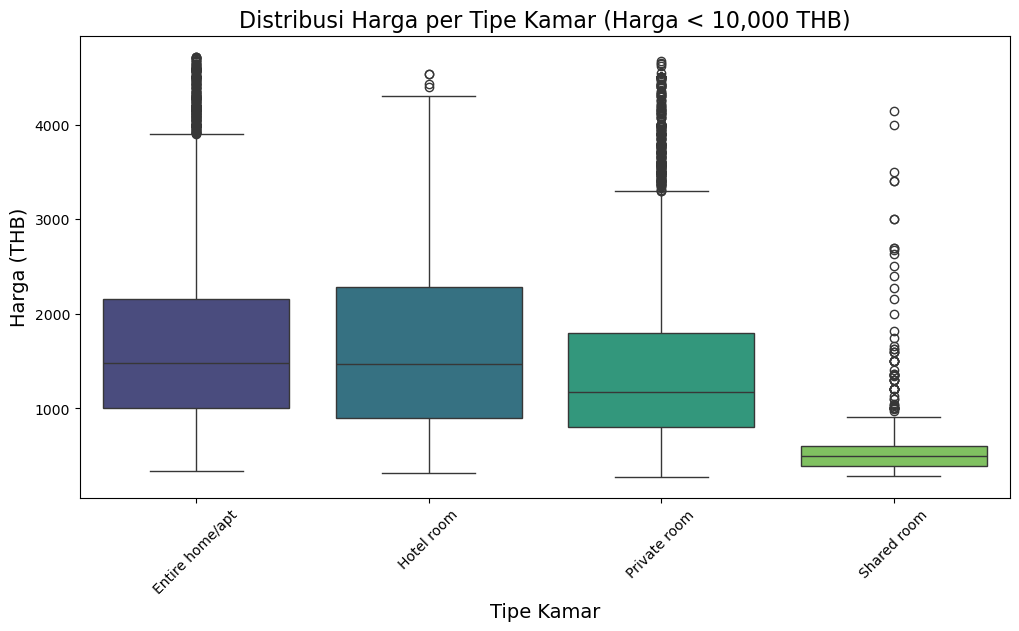

In [83]:
# Analisis Harga per Tipe Kamar
plt.figure(figsize=(12,6))
sns.boxplot(x='room_type', y='price', data=df[df['price'] < 10000], palette="viridis") # Filter outlier harga
plt.title('Distribusi Harga per Tipe Kamar (Harga < 10,000 THB)', fontsize=16)
plt.xlabel('Tipe Kamar', fontsize=14)
plt.ylabel('Harga (THB)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [84]:
# Statistik harga per tipe kamar
price_stats = df.groupby('room_type')['price'].describe(percentiles=[.25, .5, .75, .9])
print("\nStatistik Harga per Tipe Kamar:")
price_stats.round(2)


Statistik Harga per Tipe Kamar:


count     mean      std    min     25%     50%     75%  \
room_type                                                                  
Entire home/apt  8107.0  1705.51   947.00  332.0  1000.0  1480.0  2160.0   
Hotel room        553.0  1691.23  1019.02  318.0   900.0  1467.0  2286.0   
Private room     5281.0  1421.80   886.55  278.0   800.0  1177.0  1800.0   
Shared room       509.0   639.34   507.36  280.0   390.0   500.0   600.0   

                    90%     max  
room_type                        
Entire home/apt  3200.0  4720.0  
Hotel room       3199.8  4540.0  
Private room     2700.0  4673.0  
Shared room      1148.0  4143.0

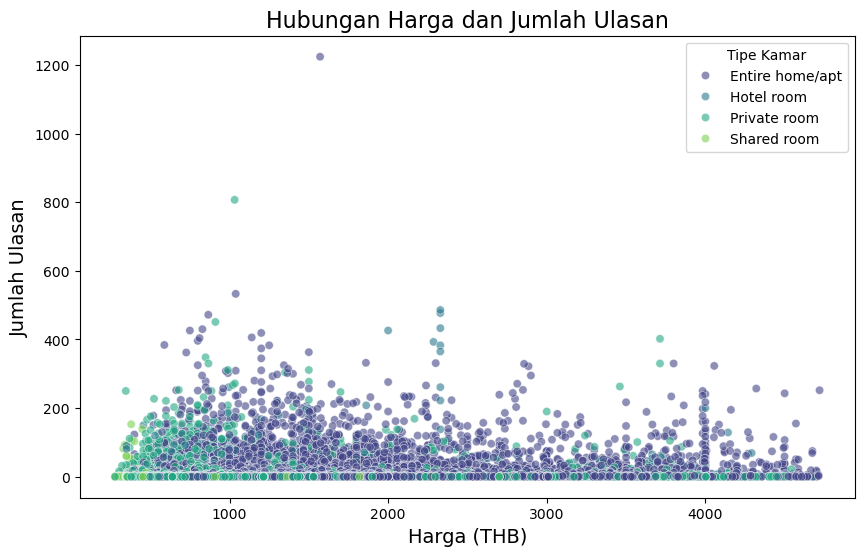

In [85]:
# Analisis Hubungan Harga dan Ulasan
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='number_of_reviews', 
                hue='room_type', data=df[df['price'] < 5000], 
                alpha=0.6, palette="viridis")
plt.title('Hubungan Harga dan Jumlah Ulasan', fontsize=16)
plt.xlabel('Harga (THB)', fontsize=14)
plt.ylabel('Jumlah Ulasan', fontsize=14)
plt.legend(title='Tipe Kamar')
plt.show()

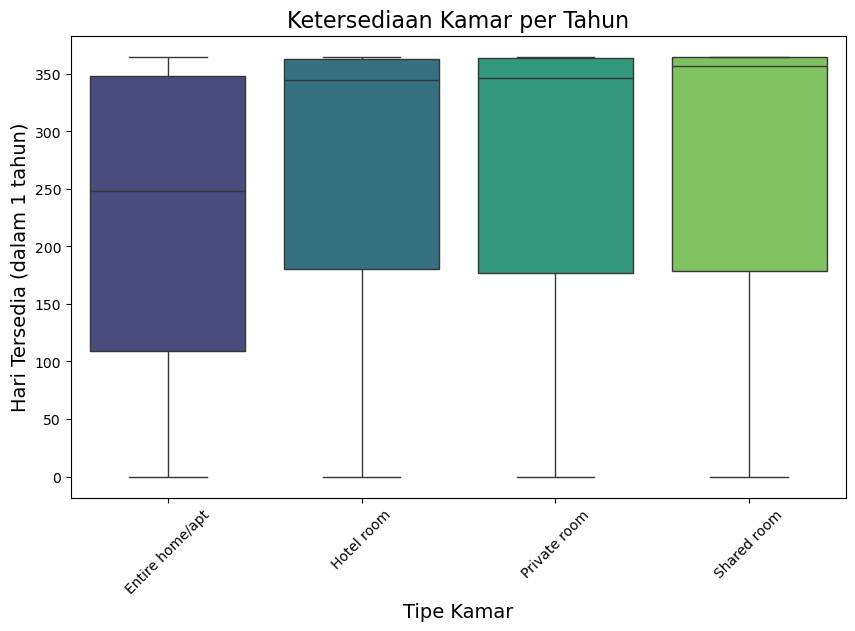

In [86]:
# Analisis Ketersediaan (Availability)
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='availability_365', data=df, palette="viridis")
plt.title('Ketersediaan Kamar per Tahun', fontsize=16)
plt.xlabel('Tipe Kamar', fontsize=14)
plt.ylabel('Hari Tersedia (dalam 1 tahun)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

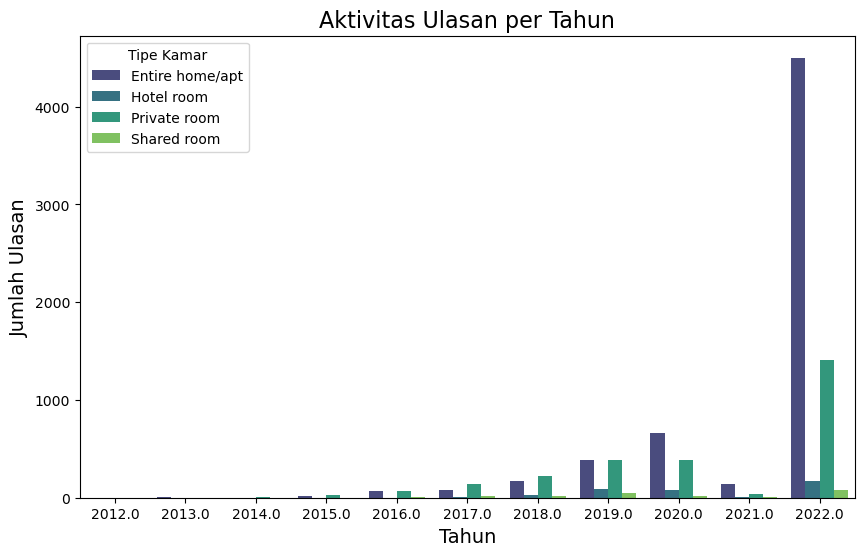

In [87]:
# Analisis Temporal (Last Review)
df['review_year'] = df['last_review'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(x='review_year', hue='room_type', data=df, palette="viridis")
plt.title('Aktivitas Ulasan per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Ulasan', fontsize=14)
plt.legend(title='Tipe Kamar')
plt.show()

Ternyata, tipe kamar Entire house/apt memang memiliki harga yang cukup tinggi dibandingkan dengan tipe kamar lainnya. jika dilihat lebih lanjut lagi secara jumlah ulasan tipe kamar Entire House juga memiliki ulasan yang cukup banyak, terutama di sekitaran harga 1000-2000 bath. hal ini menunjukkan bahwa tipe ini memang banyak diminati oleh para penyewa.

jika dilihat secara ketersediaan kamar tipe kamar Entire home/apt memiliki jumlah ketersediaan kamar yang paling banyak. hal ini masuk akal karena jumlah properti pada tipe kamar Entire home/apt memang lebih banyak dari tipe kamar lainnya.

In [88]:
## melihat setiap tipe kamar per neighbourhood
pd.crosstab(index=df['neighbourhood'], columns=df['room_type'])

room_type             Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                               
Bang Bon                            2           0             3            0
Bang Kapi                         117           1           129            3
Bang Khae                          35           1            50            0
Bang Khen                          48           3            61            1
Bang Kho laen                      89           1            34            0
Bang Khun thain                     4           0            12            1
Bang Na                           263           8           156            3
Bang Phlat                        126           3            70            6
Bang Rak                          308          65           331           34
Bang Sue                          163           0            74            3
Bangkok Noi                        40           4            80            6
Bangkok Yai                        37           3            40            3
Bueng Kum                          31           0            19            0
Chatu Chak                        255           1           259            7
Chom Thong                         40           0            28            1
Din Daeng                         206          15           185           20
Don Mueang                         36          10           109            7
Dusit                               9           0            68            8
Huai Khwang                       720          18           270           23
Khan Na Yao                        23           0            28            0
Khlong Sam Wa                      17           0            12            0
Khlong San                        166          25           128           11
Khlong Toei                      1393          59           420           15
Lak Si                             39           5            81            0
Lat Krabang                        34          14            79           16
Lat Phrao                          15           0            25            0
Min Buri                           25           0            35            1
Nong Chok                           5           0             6            0
Nong Khaem                          2           0             7            0
Parthum Wan                       208          36           118           14
Phasi Charoen                      89           1            61            1
Phaya Thai                        190          25           168           19
Phra Khanong                      324           9           196           11
Phra Nakhon                        50          68           338          129
Pom Prap Sattru Phai               39          10            50            5
Pra Wet                            56           5            84            4
Rat Burana                         33           0            18            0
Ratchathewi                       631          61           309           58
Sai Mai                            16           0            22            0
Samphanthawong                     40           5            43           11
Saphan Sung                        16           0            22            1
Sathon                            528          13           204           17
Suanluang                         190           4           152            9
Taling Chan                        11           0            31            2
Thawi Watthana                      5           0             6            0
Thon buri                          93           1            78            1
Thung khru                          8           0            13            0
Vadhana                          1195          76           445           53
Wang Thong Lang                    30           0            61            2
Yan na wa                         107           3            63          

In [89]:
# Sorting berdasarkan jumlah room_type
room_by_neigh_sorted = pd.crosstab(index=df['neighbourhood'], columns=df['room_type']).sort_values(by=df['room_type'].value_counts().index.tolist(), ascending=False)
room_by_neigh_sorted

room_type             Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                               
Khlong Toei                      1393          59           420           15
Vadhana                          1195          76           445           53
Huai Khwang                       720          18           270           23
Ratchathewi                       631          61           309           58
Sathon                            528          13           204           17
Phra Khanong                      324           9           196           11
Bang Rak                          308          65           331           34
Bang Na                           263           8           156            3
Chatu Chak                        255           1           259            7
Parthum Wan                       208          36           118           14
Din Daeng                         206          15           185           20
Phaya Thai                        190          25           168           19
Suanluang                         190           4           152            9
Khlong San                        166          25           128           11
Bang Sue                          163           0            74            3
Bang Phlat                        126           3            70            6
Bang Kapi                         117           1           129            3
Yan na wa                         107           3            63            3
Thon buri                          93           1            78            1
Phasi Charoen                      89           1            61            1
Bang Kho laen                      89           1            34            0
Pra Wet                            56           5            84            4
Phra Nakhon                        50          68           338          129
Bang Khen                          48           3            61            1
Bangkok Noi                        40           4            80            6
Samphanthawong                     40           5            43           11
Chom Thong                         40           0            28            1
Lak Si                             39           5            81            0
Pom Prap Sattru Phai               39          10            50            5
Bangkok Yai                        37           3            40            3
Don Mueang                         36          10           109            7
Bang Khae                          35           1            50            0
Lat Krabang                        34          14            79           16
Rat Burana                         33           0            18            0
Bueng Kum                          31           0            19            0
Wang Thong Lang                    30           0            61            2
Min Buri                           25           0            35            1
Khan Na Yao                        23           0            28            0
Khlong Sam Wa                      17           0            12            0
Saphan Sung                        16           0            22            1
Sai Mai                            16           0            22            0
Lat Phrao                          15           0            25            0
Taling Chan                        11           0            31            2
Dusit                               9           0            68            8
Thung khru                          8           0            13            0
Nong Chok                           5           0             6            0
Thawi Watthana                      5           0             6            0
Bang Khun thain                     4           0            12            1
Nong Khaem                          2           0             7            0
Bang Bon                            2           0             3          

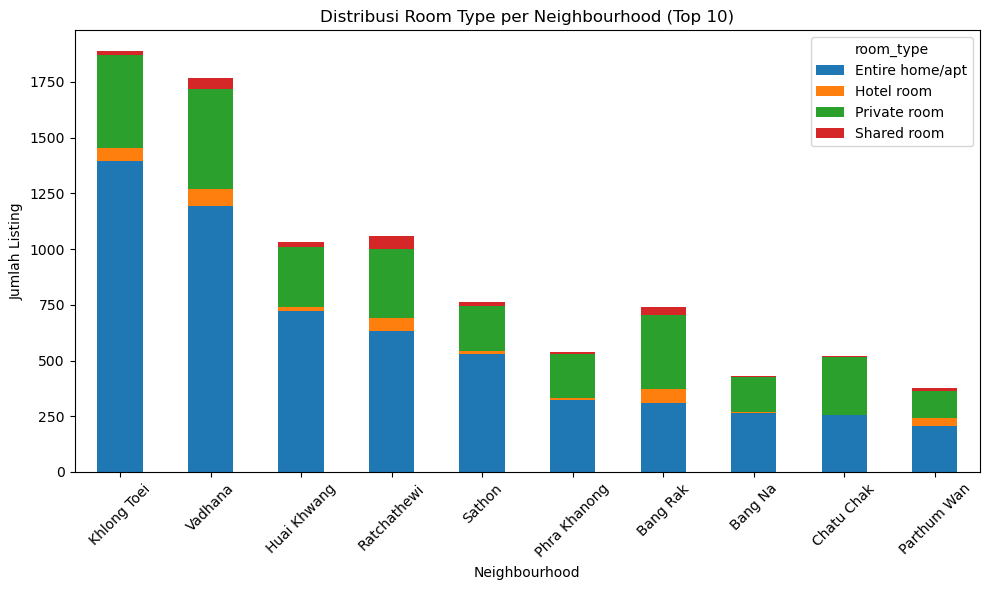

In [90]:
room_by_neigh_sorted.head(10).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribusi Room Type per Neighbourhood (Top 10)')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("Distribusi Room Type per Neighbourhood (Top 10).png")
plt.show()

Dari analisis diatas terlihat persebaran masing-masing tipe kamar di setiap area.
- Hampir semua neighbourhood punya proporsi terbesar dalam bentuk Entire home/apt.
- Khusus di Khlong Toei dan Vadhana, listing tipe ini sangat dominan, menunjukkan kawasan ini banyak properti seperti Entire house/apt untuk disewa.
- Di banyak kawasan seperti Huai Khwang, Ratchathewi, dan Bang Rak, listing Private room cukup besar.
- Ini bisa mengindikasikan banyak pemilik rumah menyewakan sebagian ruangan, cocok untuk traveler budget.
- Shared room justru terlihat lebih banyak di Ratchathewi dan Bang Rak, bisa jadi karena kawasan ini dekat kampus atau komunitas backpacker.
- Vadhana dan Khlong Toei mendominasi pasar. Total listing mereka lebih dari 1500 unit.
- Phra Khanong, Bang Na, Chatu Chak, dan Pathum Wan memiliki jumlah listing lebih sedikit, mungkin karena lebih bersifat residensial atau kurang populer untuk Airbnb.

In [91]:
## Rata-rata harga dan jumlah tipe kamar per neighbourhood
summary_kamar_area = df.groupby(['neighbourhood', 'room_type']).agg(
    jumlah_listing=('room_type', 'count'),
    rata_rata_harga=('price', 'mean'),
    median_harga=('price', 'median')
).reset_index()

summary_kamar_area


neighbourhood        room_type  jumlah_listing  rata_rata_harga  \
0           Bang Bon  Entire home/apt               2      1600.000000   
1           Bang Bon       Hotel room               0              NaN   
2           Bang Bon     Private room               3      1440.666667   
3           Bang Bon      Shared room               0              NaN   
4          Bang Kapi  Entire home/apt             117      1138.017094   
..               ...              ...             ...              ...   
195  Wang Thong Lang      Shared room               2       975.000000   
196        Yan na wa  Entire home/apt             107      1904.065421   
197        Yan na wa       Hotel room               3      1950.000000   
198        Yan na wa     Private room              63      1309.936508   
199        Yan na wa      Shared room               3      1050.000000   

     median_harga  
0          1600.0  
1             NaN  
2           900.0  
3             NaN  
4           860.0  
..            ...  
195         975.0  
196        1500.0  
197        1558.0  
198        1090.0  
199        1135.0  

[200 rows x 5 columns]

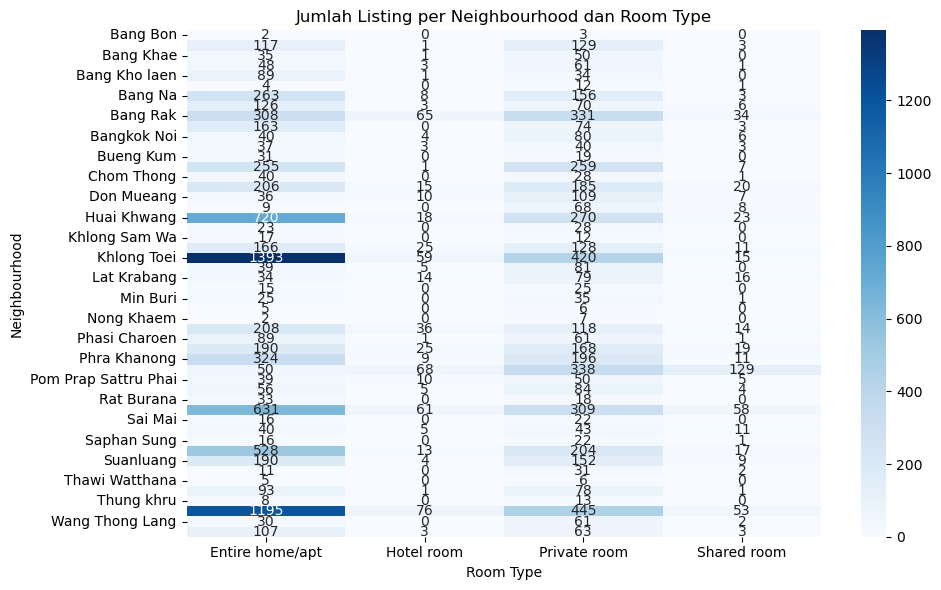

In [92]:
pivot = pd.crosstab(df['neighbourhood'], df['room_type'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Jumlah Listing per Neighbourhood dan Room Type')
plt.ylabel('Neighbourhood')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()


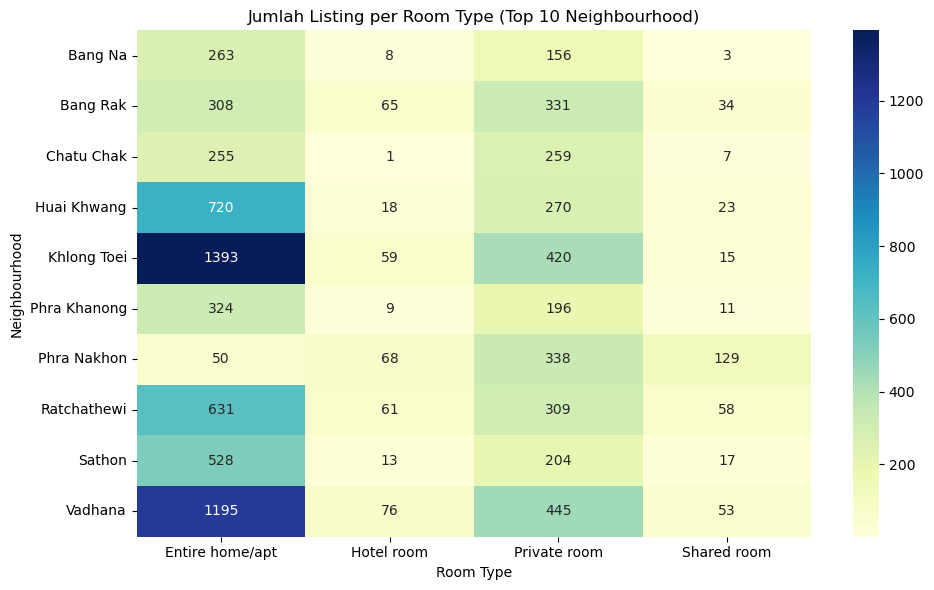

In [93]:
# menampilkan 10 teratas

# Hitung jumlah listing per neighbourhood
top_neigh = df['neighbourhood'].value_counts().head(10).index

# Filter df agar hanya ambil neighbourhood paling banyak
df_top = df[df['neighbourhood'].isin(top_neigh)]

# Buat crosstab untuk heatmap
pivot = pd.crosstab(df_top['neighbourhood'], df_top['room_type'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Jumlah Listing per Room Type (Top 10 Neighbourhood)')
plt.ylabel('Neighbourhood')
plt.xlabel('Room Type')
plt.tight_layout()
# plt.savefig("Jumlah Listing per Room Type (Top 10 Neighbourhood)")
plt.show()


Dari tabel di atas bisa dilihat bahwa daerah Vadhana memiliki jumlah listing private room yang banyak sebesar 445.
sedangkan untuk listing paling banyak tipe kamar Entire home/apt ada di daerah Khlong Toei. 

Selanjutnya kita akan mencoba melihat daerah-daerah yang masih under-supply atau dalam artian daerah ini masih belum memiliki supply listing yang banyak.
untuk mencari daerah under-supply perlu diperhatikan treshold atau batas persentase ideal.
- threshold < 20% ==> Supply sedikit. bisa jadi peluang besar, tapi bisa jadi tanda permintaan rendah juga.
- 20%-30% ==> Supply lumayan rendah, demand biasanya stabil, peluang ekspansi bagus.
- 30%-40% ==> supply agak rendah, tapi sudah mulai banyak pesaing
- 40%-100% ==> supply sudah banyak.

berdasarkan kriteria treshold tersebut, kita akan menggunakan treshold **dibawah 40 %** dengan alasan treshold ini cukup rendah untuk indikasi under-supply, tapi tidak terlalu ekstrim dan masih ada demandnya walaupun sudah banyak pesaing.

In [94]:
## Under-supply Neigbourhood dan room types secara umum
room_dist = pd.crosstab(df['neighbourhood'], df['room_type'], normalize='index') * 100
room_dist.head(10)


room_type        Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                          
Bang Bon               40.000000    0.000000     60.000000     0.000000
Bang Kapi              46.800000    0.400000     51.600000     1.200000
Bang Khae              40.697674    1.162791     58.139535     0.000000
Bang Khen              42.477876    2.654867     53.982301     0.884956
Bang Kho laen          71.774194    0.806452     27.419355     0.000000
Bang Khun thain        23.529412    0.000000     70.588235     5.882353
Bang Na                61.162791    1.860465     36.279070     0.697674
Bang Phlat             61.463415    1.463415     34.146341     2.926829
Bang Rak               41.734417    8.807588     44.850949     4.607046
Bang Sue               67.916667    0.000000     30.833333     1.250000

In [95]:
# Neigbourhood dengan Under-supply room type Entire home/apt
us_apt = room_dist[room_dist['Entire home/apt'] < 40].sort_values(by='Entire home/apt', ascending=False)
us_apt.head(10)

room_type             Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                               
Thung khru                  38.095238    0.000000     61.904762     0.000000
Pra Wet                     37.583893    3.355705     56.375839     2.684564
Lat Phrao                   37.500000    0.000000     62.500000     0.000000
Pom Prap Sattru Phai        37.500000    9.615385     48.076923     4.807692
Wang Thong Lang             32.258065    0.000000     65.591398     2.150538
Lak Si                      31.200000    4.000000     64.800000     0.000000
Bangkok Noi                 30.769231    3.076923     61.538462     4.615385
Taling Chan                 25.000000    0.000000     70.454545     4.545455
Lat Krabang                 23.776224    9.790210     55.244755    11.188811
Bang Khun thain             23.529412    0.000000     70.588235     5.882353

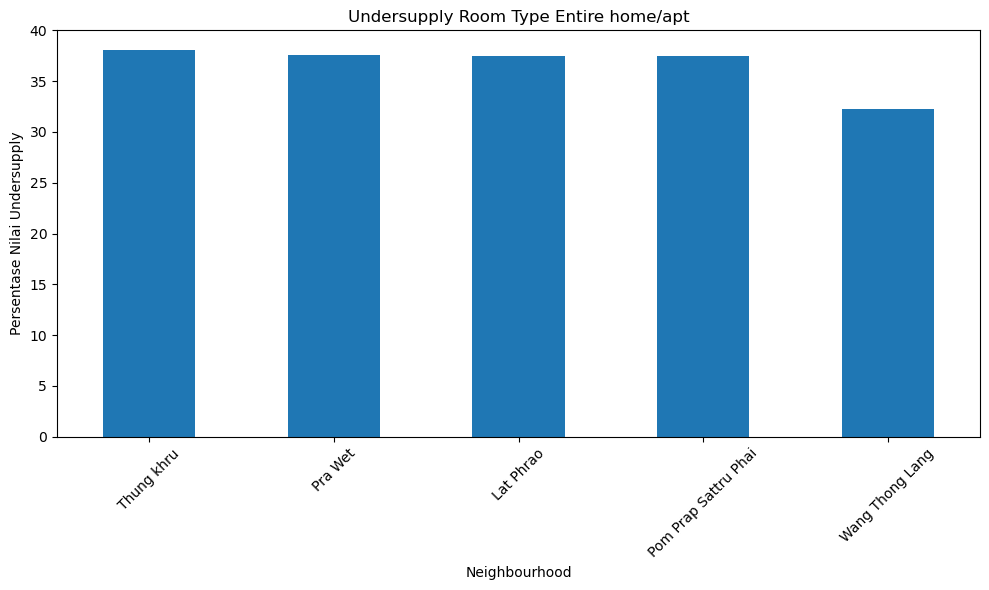

In [96]:
us_apt['Entire home/apt'].head(5).plot(kind='bar', figsize=(10,6))
plt.title('Undersupply Room Type Entire home/apt')
plt.xlabel('Neighbourhood')
plt.ylabel('Persentase Nilai Undersupply')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("Distribusi Room Type per Neighbourhood (Top 10).png")
plt.show()

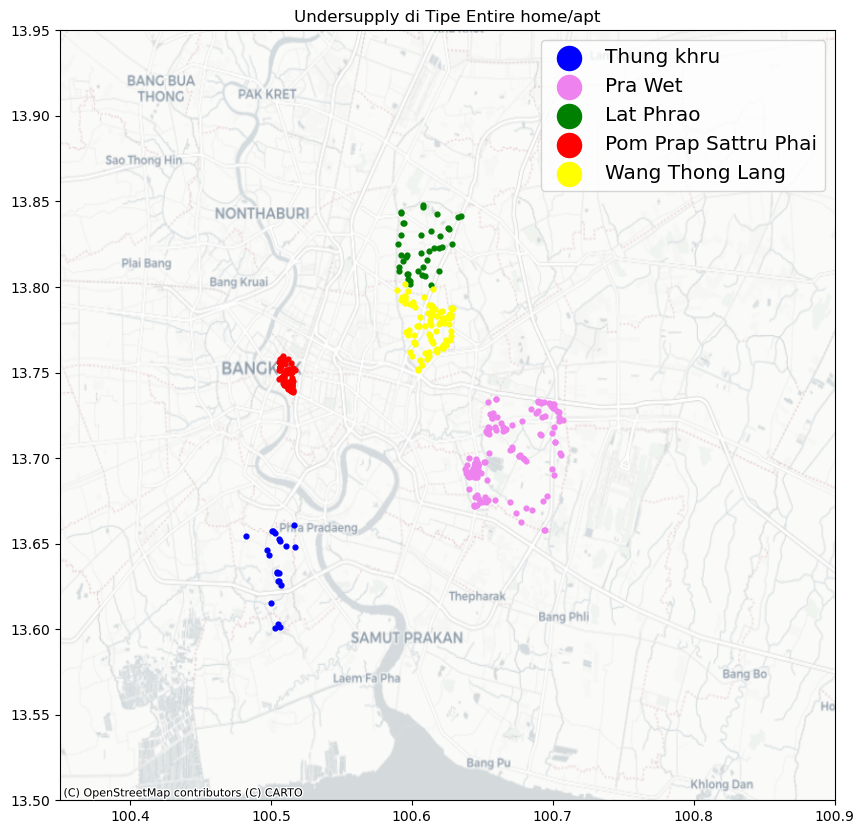

In [97]:
## Visualisai undersupply di tipe Entire home/apt

fig, ax = plt.subplots(figsize=(10, 10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in us_apt.head(5).iterrows():
    ax.scatter(
        df[df['neighbourhood'] == neighbourhood[0]]['longitude'],
        df[df['neighbourhood'] == neighbourhood[0]]['latitude'],
        label=neighbourhood[0],
        zorder=1,
        alpha=1,
        c=colors[i],
        s=12
    )
    i += 1

# Atur BBox secara manual untuk Bangkok
BBox = [100.35, 100.90, 13.50, 13.95] 
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.set_title('Undersupply di Tipe Entire home/apt')
ax.legend(fontsize='x-large', markerscale=5)

# Tambahkan peta dari CartoDB
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

# save peta
# plt.savefig("Undersuply di Tipe Entire home.png")

plt.show()

In [98]:
## Neigbourhood dengan Under-supply room type Hotel Room
us_hotel = room_dist[room_dist['Hotel room'] < 40].sort_values(by='Hotel room', ascending=False)
us_hotel.head(10)

room_type             Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                               
Phra Nakhon                  8.547009   11.623932     57.777778    22.051282
Lat Krabang                 23.776224    9.790210     55.244755    11.188811
Pom Prap Sattru Phai        37.500000    9.615385     48.076923     4.807692
Parthum Wan                 55.319149    9.574468     31.382979     3.723404
Bang Rak                    41.734417    8.807588     44.850949     4.607046
Khlong San                  50.303030    7.575758     38.787879     3.333333
Phaya Thai                  47.263682    6.218905     41.791045     4.726368
Don Mueang                  22.222222    6.172840     67.283951     4.320988
Ratchathewi                 59.584514    5.760151     29.178470     5.476865
Samphanthawong              40.404040    5.050505     43.434343    11.111111

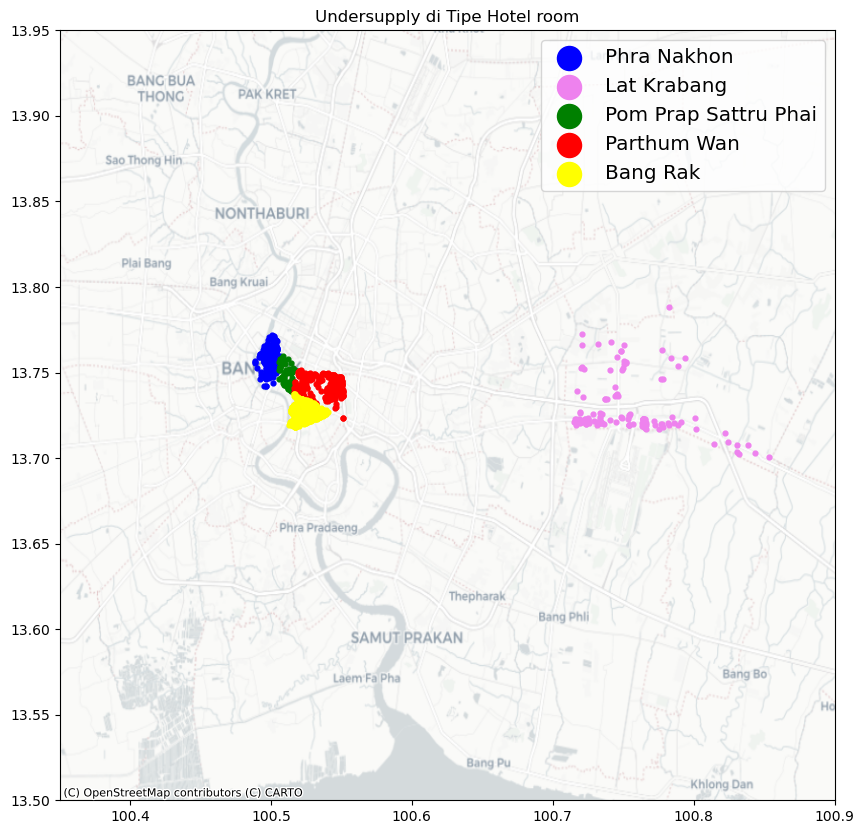

In [99]:
## Visualisai undersupply di tipe Entire home/apt

fig, ax = plt.subplots(figsize=(10, 10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in us_hotel.head(5).iterrows():
    ax.scatter(
        df[df['neighbourhood'] == neighbourhood[0]]['longitude'],
        df[df['neighbourhood'] == neighbourhood[0]]['latitude'],
        label=neighbourhood[0],
        zorder=1,
        alpha=1,
        c=colors[i],
        s=12
    )
    i += 1

# Atur BBox secara manual untuk Bangkok
BBox = [100.35, 100.90, 13.50, 13.95]
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.set_title('Undersupply di Tipe Hotel room')
ax.legend(fontsize='x-large', markerscale=5)

# Tambahkan peta dari CartoDB
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

# save peta
# plt.savefig("Undersuply di Tipe Hotel.png")

plt.show()

In [100]:
## Neigbourhood dengan Under-supply room type Private room
us_private = room_dist[room_dist['Private room'] < 40].sort_values(by='Private room', ascending=False)
us_private.head(10)

room_type      Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                        
Khlong San           50.303030    7.575758     38.787879     3.333333
Bueng Kum            62.000000    0.000000     38.000000     0.000000
Phra Khanong         60.000000    1.666667     36.296296     2.037037
Bang Na              61.162791    1.860465     36.279070     0.697674
Yan na wa            60.795455    1.704545     35.795455     1.704545
Rat Burana           64.705882    0.000000     35.294118     0.000000
Bang Phlat           61.463415    1.463415     34.146341     2.926829
Parthum Wan          55.319149    9.574468     31.382979     3.723404
Bang Sue             67.916667    0.000000     30.833333     1.250000
Ratchathewi          59.584514    5.760151     29.178470     5.476865

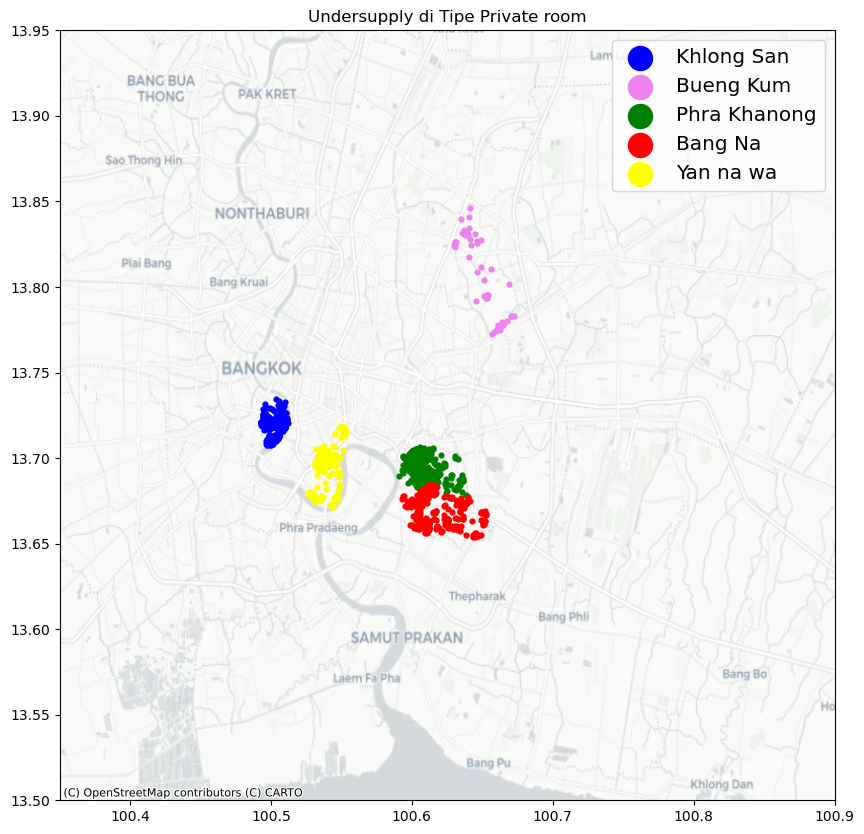

In [101]:
## Visualisai undersupply di tipe Entire home/apt

fig, ax = plt.subplots(figsize=(10, 10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in us_private.head(5).iterrows():
    ax.scatter(
        df[df['neighbourhood'] == neighbourhood[0]]['longitude'],
        df[df['neighbourhood'] == neighbourhood[0]]['latitude'],
        label=neighbourhood[0],
        zorder=1,
        alpha=1,
        c=colors[i],
        s=12
    )
    i += 1

# Atur BBox secara manual untuk Bangkok
BBox = [100.35, 100.90, 13.50, 13.95]
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.set_title('Undersupply di Tipe Private room')
ax.legend(fontsize='x-large', markerscale=5)

# Tambahkan peta dari CartoDB
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

# save peta
# plt.savefig("Undersuply di Tipe Private.png")

plt.show()

In [102]:
## Neigbourhood dengan Under-supply room type Shared room
us_shared = room_dist[room_dist['Shared room'] < 40].sort_values(by='Shared room', ascending=False)
us_shared.head(10)

room_type             Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                               
Phra Nakhon                  8.547009   11.623932     57.777778    22.051282
Lat Krabang                 23.776224    9.790210     55.244755    11.188811
Samphanthawong              40.404040    5.050505     43.434343    11.111111
Dusit                       10.588235    0.000000     80.000000     9.411765
Bang Khun thain             23.529412    0.000000     70.588235     5.882353
Ratchathewi                 59.584514    5.760151     29.178470     5.476865
Pom Prap Sattru Phai        37.500000    9.615385     48.076923     4.807692
Phaya Thai                  47.263682    6.218905     41.791045     4.726368
Din Daeng                   48.356808    3.521127     43.427230     4.694836
Bangkok Noi                 30.769231    3.076923     61.538462     4.615385

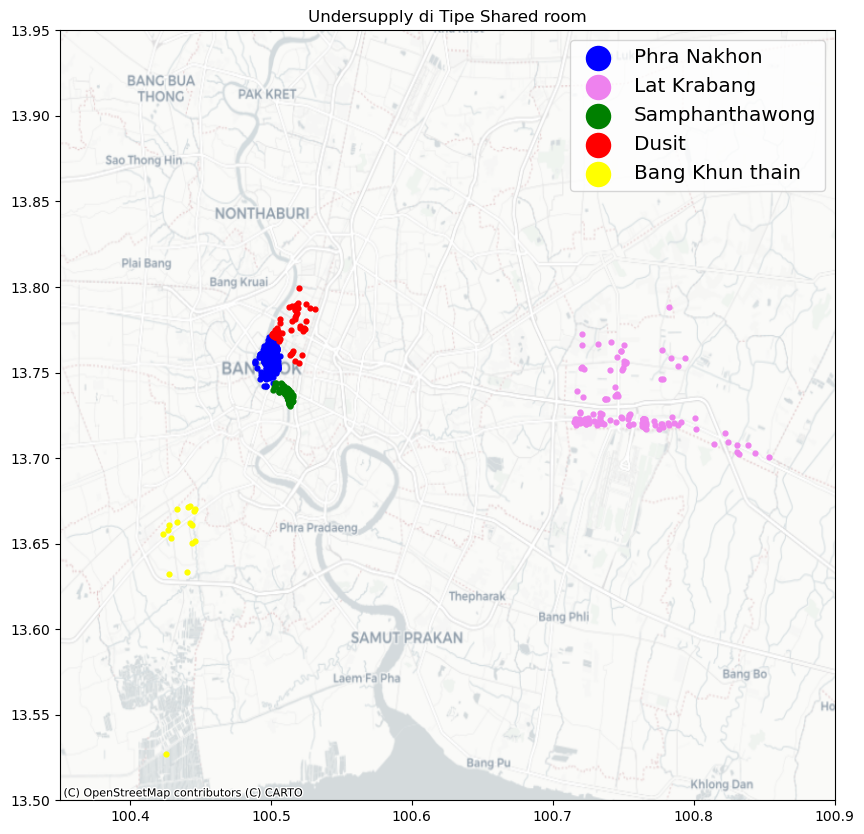

In [103]:
## Visualisai undersupply di tipe Entire home/apt

fig, ax = plt.subplots(figsize=(10, 10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in us_shared.head(5).iterrows():
    ax.scatter(
        df[df['neighbourhood'] == neighbourhood[0]]['longitude'],
        df[df['neighbourhood'] == neighbourhood[0]]['latitude'],
        label=neighbourhood[0],
        zorder=1,
        alpha=1,
        c=colors[i],
        s=12
    )
    i += 1

# Atur BBox secara manual untuk Bangkok
BBox = [100.35, 100.90, 13.50, 13.95]
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.set_title('Undersupply di Tipe Shared room')
ax.legend(fontsize='x-large', markerscale=5)

# Tambahkan peta dari CartoDB
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

# save peta
# plt.savefig("Undersuply di Tipe Shared.png")

plt.show()

Dari analisis diatas kita mengetahui bahwa:
- Daerah yang masih under supply berdasarkan **tipe Entire home/apt** adalah daerah **Thung khru, Pra Wet, Lat Phrao, Pom Prap Sattru Phai dan Wang Thong Lang.**
- Untuk tipe **hotel room**, under-supply berada di daerah **Phra Nakhon, Lat Krabang, Pom Prap Sattru Phai, Parthum Wan dan Bang Rak.**
- Untuk Tipe **Private room**, berada di daerah **Khlong San, Bueng Kum, Phra Khanong, Bang Na dan Ya na wa.**
- Berdasarkan tipe **shared room**, daerah seperti **Phra Nakhon, Lat Krabang, Samphanthawong, Dusit dan Bang Khun Thain** merupakan daerah yang under-supply. 


Selanjutnya kita bisa melihat potensi pasar agar pilihan lokassi eksapansi kita lebih optimal.

## Rasio Listing vs Harga: Potensi Pasar

In [104]:
avg_price = df.groupby(['neighbourhood', 'room_type'])['price'].mean().unstack()
listing_count = pd.crosstab(df['neighbourhood'], df['room_type'])

# Buat rasio sederhana: harga rata-rata / jumlah listing
market_potential = avg_price / listing_count.replace(0, np.nan)

market_potential.head(10)

room_type        Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                          
Bang Bon              800.000000         NaN    480.222222          NaN
Bang Kapi               9.726642  600.000000      9.088576   251.777778
Bang Khae              48.988571  750.000000     22.002800          NaN
Bang Khen              27.734375  462.000000     17.752217   550.000000
Bang Kho laen          15.563439  900.000000     48.916955          NaN
Bang Khun thain       297.312500         NaN     93.555556   700.000000
Bang Na                 4.308794  306.921875      8.744288   284.111111
Bang Phlat             10.109914  699.444444     14.860408   156.083333
Bang Rak                7.390148   27.010414      5.347551    16.680796
Bang Sue                6.017803         NaN     15.731373   229.222222

In [105]:
## Market potential kategori Private Room
market_potential.sort_values(by='Private room', ascending=False).head(10)

room_type        Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                          
Bang Bon              800.000000         NaN    480.222222          NaN
Thawi Watthana        256.000000         NaN    222.222222          NaN
Nong Chok             584.800000         NaN    152.305556          NaN
Khlong Sam Wa         105.955017         NaN    114.361111          NaN
Thung khru            200.562500         NaN     98.621302          NaN
Bang Khun thain       297.312500         NaN     93.555556        700.0
Nong Khaem           1580.250000         NaN     92.367347          NaN
Bueng Kum              52.587929         NaN     68.750693          NaN
Rat Burana             45.694215         NaN     53.120370          NaN
Saphan Sung           119.441406         NaN     52.665289        313.0

In [106]:
## Market potential kategori Entire home/apt
market_potential.sort_values(by='Entire home/apt', ascending=False).head(10)

room_type        Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                          
Nong Khaem           1580.250000         NaN     92.367347          NaN
Bang Bon              800.000000         NaN    480.222222          NaN
Nong Chok             584.800000         NaN    152.305556          NaN
Bang Khun thain       297.312500         NaN     93.555556        700.0
Thawi Watthana        256.000000         NaN    222.222222          NaN
Taling Chan           224.239669         NaN     46.300728        387.5
Thung khru            200.562500         NaN     98.621302          NaN
Dusit                 195.987654         NaN     20.442907         75.0
Sai Mai               140.109375         NaN     40.045455          NaN
Lat Phrao             134.751111         NaN     40.374400          NaN

In [107]:
## Market potential kategori Hotel room
market_potential.sort_values(by='Hotel room', ascending=False).head(10)

room_type       Entire home/apt   Hotel room  Private room  Shared room
neighbourhood                                                          
Thon buri             13.323043  1400.000000     16.399737   320.000000
Phasi Charoen         13.184068  1106.000000     16.217952   600.000000
Bang Kho laen         15.563439   900.000000     48.916955          NaN
Bang Khae             48.988571   750.000000     22.002800          NaN
Bang Phlat            10.109914   699.444444     14.860408   156.083333
Yan na wa             17.795004   650.000000     20.792643   350.000000
Bang Kapi              9.726642   600.000000      9.088576   251.777778
Bangkok Yai           47.010957   551.111111     36.449375   264.333333
Bang Khen             27.734375   462.000000     17.752217   550.000000
Samphanthawong        55.948750   432.960000     40.168740    83.900826

In [108]:
## Market potential kategori Shared room
market_potential.sort_values(by='Shared room', ascending=False).head(10)

room_type        Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                          
Chom Thong             34.264375         NaN     45.164541       1500.0
Min Buri               60.300800         NaN     26.142041        800.0
Bang Khun thain       297.312500         NaN     93.555556        700.0
Phasi Charoen          13.184068      1106.0     16.217952        600.0
Bang Khen              27.734375       462.0     17.752217        550.0
Wang Thong Lang        45.350000         NaN     19.204246        487.5
Taling Chan           224.239669         NaN     46.300728        387.5
Yan na wa              17.795004       650.0     20.792643        350.0
Thon buri              13.323043      1400.0     16.399737        320.0
Saphan Sung           119.441406         NaN     52.665289        313.0

Tabel itu menunjukkan *market potential* untuk tiap kombinasi `neighbourhood` dan `room_type`.
Market potential = avg_price / listing_count

Artinya:
- Semakin tinggi nilainya, semakin besar potensi penghasilan rata-rata per listing (bisa jadi karena harga tinggi, atau karena sedikit listing tapi harga tetap tinggi).

- NaN artinya data kosong atau tidak bisa dihitung. Dalam konteks ini, penyebabnya:
    - Tidak ada listing untuk kombinasi tersebut
    - Listing count = 0, jadi ketika bagi avg_price / 0, Python kasih hasil NaN untuk hindari error pembagian dengan nol.

- Berdasarkan market potential nya jika dilihat berdasarkan tipe **Private room**, daerah **Bang Bon, Thawai Wattahana, Nang Chock, Khlong Sam Wa dan Thung Khru** memiliki potensi pasar yang tinngi.
- Berdasarkan tipe **Entire home/apt** daerah **Nong Khaem, Bang Bon, Nong Chock, Bang Khun Thain dan Thawi Watthana** memiliki potensi pasar yang tinggi.
- Untuk tipe **Hotel room**, daerah **Thon Buri, Phasi Charoen, Bang Kho Lean, Bang Khae dan Bang Phlat** menjadi daerah yang memiliki potensi pasar tertinggi.
- Potensi pasar tertinggi pada tipe kamar **Shared room** berada di daerah **Chom Thong, Min Buri, bang Khun Thain, Phasi Chareon dan Bang Khen.**


## Strategi Minimum Night Stay

Setelah kita menganalisis tipe kamar mana yang optimal. kita selanjutnya ingin mengetahui:
- Berapa minimum night stay yang paling optimal untuk menarik booking?

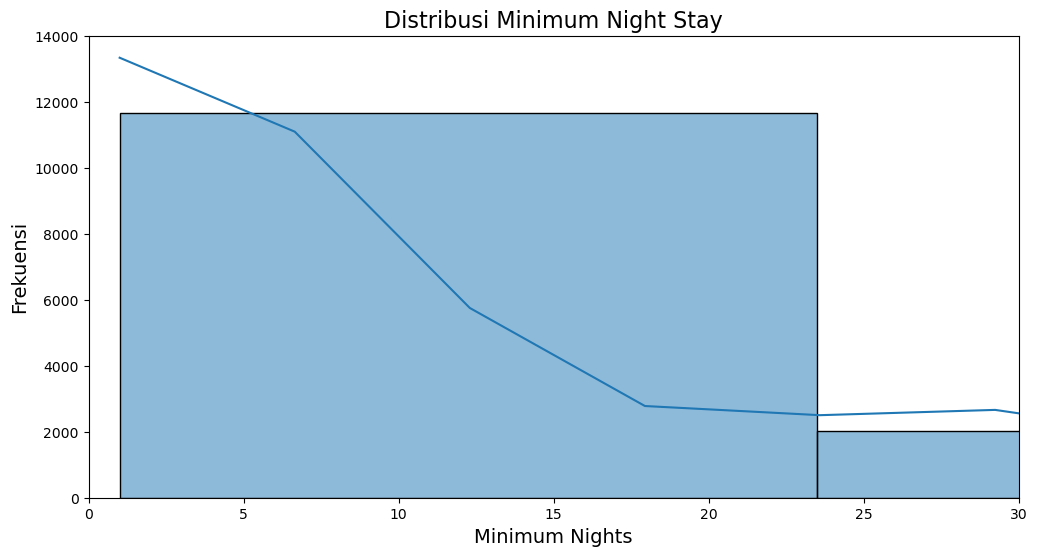

In [109]:
# melihat distribusi minimum nights
plt.figure(figsize=(12,6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribusi Minimum Night Stay', fontsize=16)
plt.xlabel('Minimum Nights', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xlim(0, 30)
plt.show()

In [110]:
## Cek rata-rata harga per malam berdasarkan minimum night

df['price_per_night'] = df['price'] / df['minimum_nights']
avg_price_per_min = df.groupby('minimum_nights')['price_per_night'].mean()
avg_price_per_min.head(10)

minimum_nights
1     1615.787817
2      837.962258
3      562.391832
4      394.162281
5      334.826835
6      198.823333
7      219.064478
8      142.085938
9      207.822222
10     160.732432
Name: price_per_night, dtype: float64

In [111]:
## Gabungkan dengan frekuensi (jumlah listing per minimum night)

night_freq = df['minimum_nights'].value_counts().sort_index()
optimal_df = pd.DataFrame({
    'avg_price_per_night': avg_price_per_min,
    'listing_count': night_freq
}).dropna()

In [112]:
optimal_df

avg_price_per_night  listing_count
minimum_nights                                    
1                       1615.787817           7338
2                        837.962258           1550
3                        562.391832            906
4                        394.162281            171
5                        334.826835            395
...                             ...            ...
999                        1.315315              1
1000                       0.650000              1
1095                       0.505936              1
1115                       1.793722              1
1125                       2.577778              1

[83 rows x 2 columns]

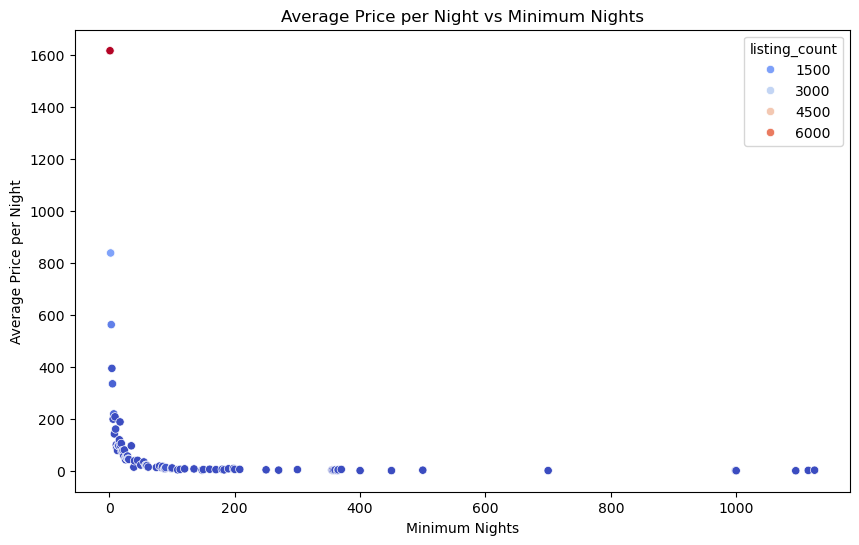

In [113]:
# Visualisasi dengan scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=optimal_df, x='minimum_nights', y='avg_price_per_night', hue='listing_count', palette='coolwarm')
plt.title('Average Price per Night vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price per Night')
plt.show()

In [114]:
## melihat minimum_nights berdasarkan room_type
df.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)

room_type
Entire home/apt    20.980141
Private room        9.342170
Shared room         3.581532
Hotel room          1.886076
Name: minimum_nights, dtype: float64

Berdasarkan analisa diatas minimum tipe Entire home/apt rata-rata minimum nights nya yaitu 20.98 hari. sedangkan Private room 9.34 hari. Tipe shared room dengan rata-rata 3.58 hari. dan yang paling sedikit yaitu Hotel room 1.88 hari.

Selanjutnya kita akan melihat lebih dalam minimum nights yang optimal. untuk melihat minimum nights yang optimal kita menggunakan kriteria:
- banyak listing (pasar listingnya hidup)
- harga per malamnya

Minimum nights yang optimal adalah: 1 malam


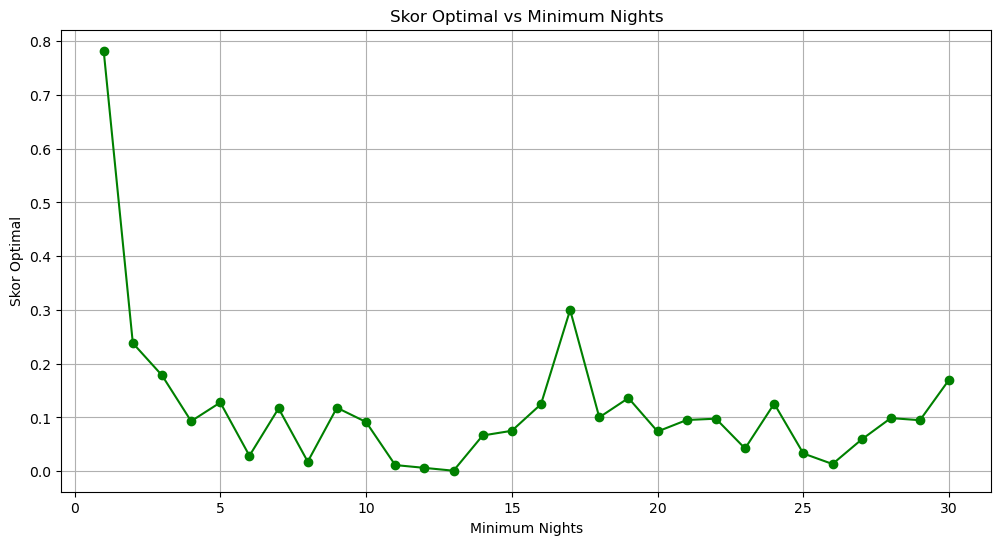

In [115]:
# 1. Membuat data agregat
agg_data = df.groupby('minimum_nights').agg(
    listing_count=('id', 'count'),
    avg_price=('price', 'mean')
).reset_index()

# 2. Membatasi minimum nights menjadi kurang dari 30 hari
agg_data = agg_data[agg_data['minimum_nights'] <= 30]

# 3. Normalisasi listing_count dan avg_price (0-1)
scaler = MinMaxScaler()

agg_data[['listing_count_norm', 'avg_price_norm']] = scaler.fit_transform(
    agg_data[['listing_count', 'avg_price']]
)

# 4. Hitung skor gabungan
agg_data['optimal_score'] = agg_data['listing_count_norm'] * 0.7 + agg_data['avg_price_norm'] * 0.3
# (bobot 70% untuk banyak listing, 30% untuk harga)

# 5. Cari minimum nights dengan skor tertinggi
optimal_min_nights = agg_data.loc[agg_data['optimal_score'].idxmax(), 'minimum_nights']

print(f"Minimum nights yang optimal adalah: {optimal_min_nights} malam")

# 6. Visualisasi
plt.figure(figsize=(12,6))
plt.plot(agg_data['minimum_nights'], agg_data['optimal_score'], marker='o', color='green')
plt.title('Skor Optimal vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Skor Optimal')
plt.grid()

# save line grafik
# plt.savefig("Skor Optimal vs Minimum Nights.png")

plt.show()


Dari grafik di atas bisa kita simpulkan bahwa minimum nights yang optimal adalah 1 malam.

## Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut terkait area ekspansi:
- Area terbaik untuk ekspansi **properti premium** adalah **Pom Prap Sattru Phai, Parthum Wan, Bang Bon, Bang Rak, dan Phaya Thai**, karena kombinasi harga sewa tinggi, review banyak, dan persaingan listing masih moderat.
- Area terbaik untuk **hidden gem** (harga masih rendah, demand tinggi) adalah **Pom Prap Sattru Phai, Phaya Thai, Bang Sue, Lat Krabang, dan Don Mueang.** Area ini cocok untuk ekspansi sebelum kompetisi meningkat.
- **Tipe properti** yang paling diminati adalah **Entire home/apt**, terutama untuk traveler yang mencari privasi penuh.
- Minimum night stay yang optimal perlu disesuaikan dengan lokasi:
    - Untuk area dekat bandara (Lat Krabang, Don Mueang), idealnya 1–2 malam.
    - Untuk area dalam kota (Pom Prap, Phaya Thai), bisa fleksibel 2–5 malam tergantung strategi harga.

**Rekomendasi**

1. Fokus listing pada Entire Home/Apt di area rekomendasi untuk mengoptimalkan potensi pemesanan.

2. Masuk cepat ke hidden gem area seperti Bang Sue dan Don Mueang untuk mendapatkan properti dengan harga beli rendah dan ROI tinggi di masa depan.

3. Strategi harga dinamis:
    * Mulai dengan harga sedikit di bawah rata-rata area untuk cepat mendapat review awal.
    * Naikkan harga bertahap setelah mendapatkan cukup review positif.

5. Perhatikan seasonality dan event lokal (seperti festival di Chinatown, event di Victory Monument) untuk mengatur minimum stay dan harga secara lebih strategis.

6. Optimasi listing: Gunakan foto profesional, highlight fasilitas unik, dan buat deskripsi properti yang menarik (terutama menonjolkan akses transportasi dan pengalaman lokal di area seperti Pom Prap dan Phaya Thai).

In [116]:
## save file
# df.to_excel("Airbnb_clean.xlsx", index=False)